# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
#Importing basic necessary libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.stats as stats

In [ ]:
#Importing warning filter.

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Setting the precision of floating numbers to 5 decimal points.
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [ ]:
#Loading data set onto Dataframe.

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Project 4/INNHotelsGroup.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [ ]:
#Checking the shape of the data.

print("There are", df.shape[0], "rows and", df.shape[1], "columns in the data set.")

There are 36275 rows and 19 columns in the data set.


In [ ]:
#Checking the first 5 rows of the data set.

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
#Checking the last 5 rows of the data set.

df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [ ]:
#Checking basic data information.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

"Booking_ID", "type_of_meal_plan", "room_type_reserved", "market_segment_type", and "booking_status" are the only non-numeric columns. There appear to be no missing values.

In [ ]:
#Getting a statistical summary of the numeric columns.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


The data collected is only from 2017 to 2018. The rest of the data looks normal, except for the odd room that costs $0.

In [ ]:
#Checking for missinng values.

df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There appear to be no missing values.

In [ ]:
#Checking for duplicate values.

df.duplicated().sum()

0

There appear to be no duplicate values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
#Defining a function to create a boxplot and histogram together.

def histoBoxplot(data, feature, figsize = (15, 10), kde = True, bins = None):
    """
    Boxplot and Histogram combined:

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    #Creating the 2 subplots.
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,                       #Number of rows of the subplot grid
        sharex = True,                   #x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )

    #Creating the boxplot that also indicates the mean.
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "lightpink")

    #Creating the histogram.
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, color = "lightpink"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, color = "lightpink"
    )

    #Adding mean to the histogram.
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--")

    #Adding median to the histogram.
    ax_hist2.axvline(data[feature].median(), color = "red", linestyle = "-")

###Univariate Analysis

* "Booking_ID" is a categorical column, so I will not analyze it.
* "arrival_year" is not very useful, since we know from the stats summary that there is only data from 2017 and 2018.
* "arrival_date" might misrepresent the data if it is not paired with the respective month, so I will not analyze it individually.

1. "no_of_adults"

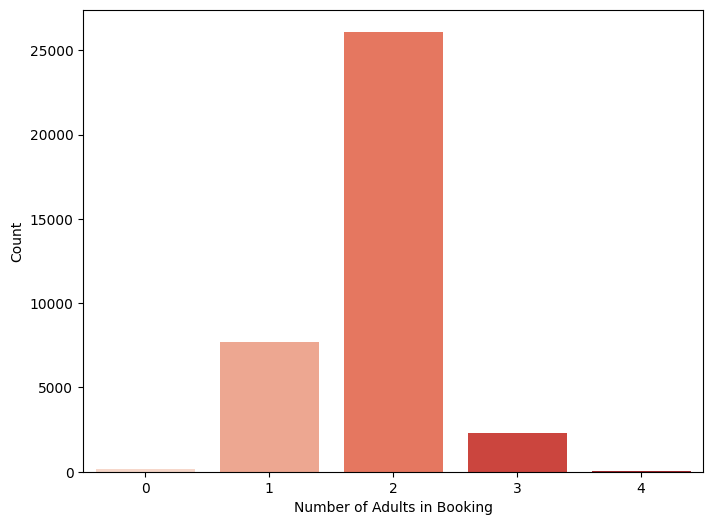

In [ ]:
#Creating a countplot of the number of adults in bookings.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "no_of_adults", palette = "Reds")
plt.xlabel("Number of Adults in Booking")
plt.ylabel("Count")
plt.show()

The majority of bookings are for two adults (probably couples). Strangely, there are a handful of bookings with no (zero) adults marked.

2. "no_of_children"

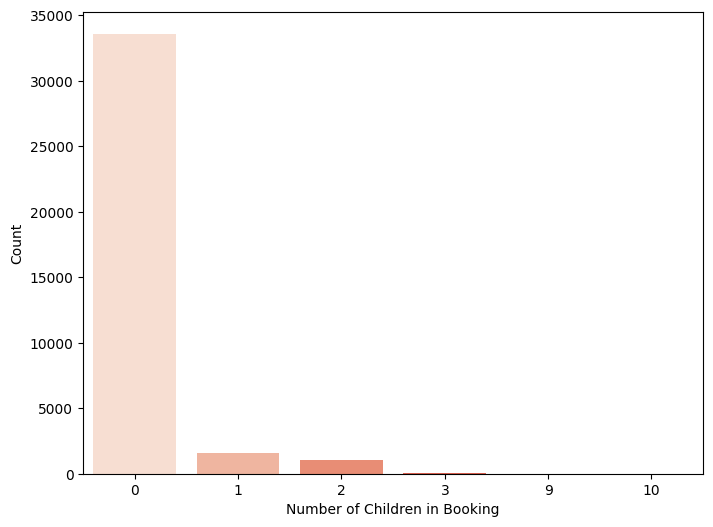

In [ ]:
#Creating a countplot of the number of children in bookings.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "no_of_children", palette = "Reds")
plt.xlabel("Number of Children in Booking")
plt.ylabel("Count")
plt.show()

The majority of bookings are only adults (no children).

3. "no_of_weekend_nights"

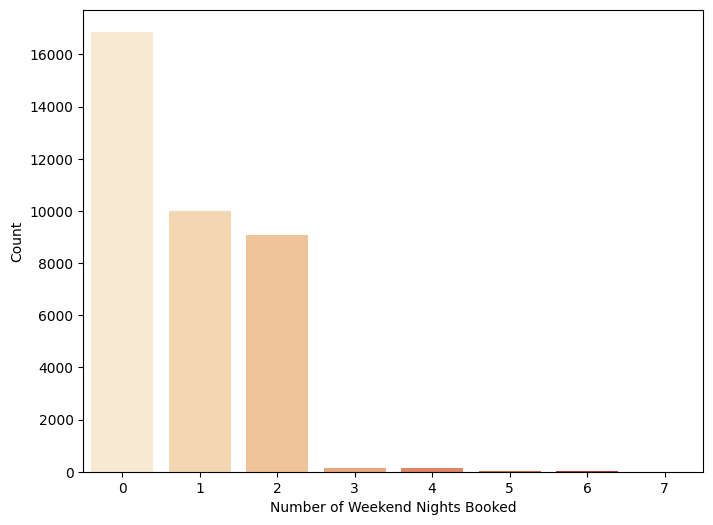

In [ ]:
#Creating a countplot of the number of weekend nights booked.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "no_of_weekend_nights", palette = "OrRd")
plt.xlabel("Number of Weekend Nights Booked")
plt.ylabel("Count")
plt.show()

Most bookings have no weekend night stays. A good amount have one day (either Saturday or Sunday), two days (both Saturday and Sunday), and very few have more than two (stays over a week long).

4. "no_of_week_nights"

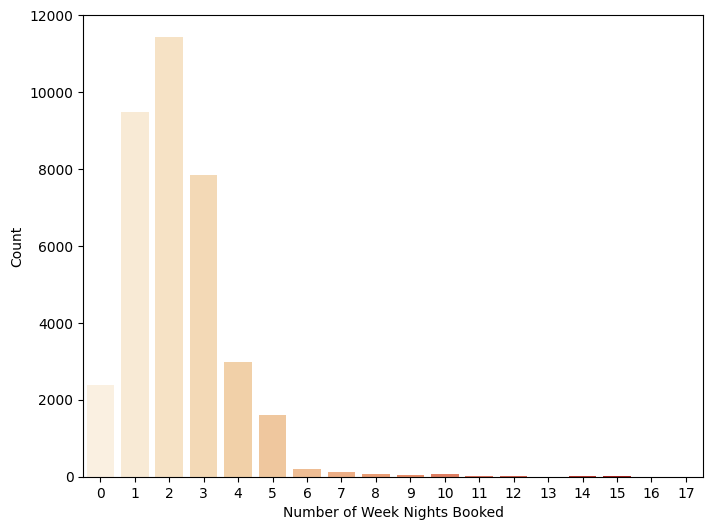

In [ ]:
#Creating a countplot of the number of week nights booked.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "no_of_week_nights", palette = "OrRd")
plt.xlabel("Number of Week Nights Booked")
plt.ylabel("Count")
plt.show()

Most weekday bookings are for two or one nights.

5. "type_of_meal_plan"

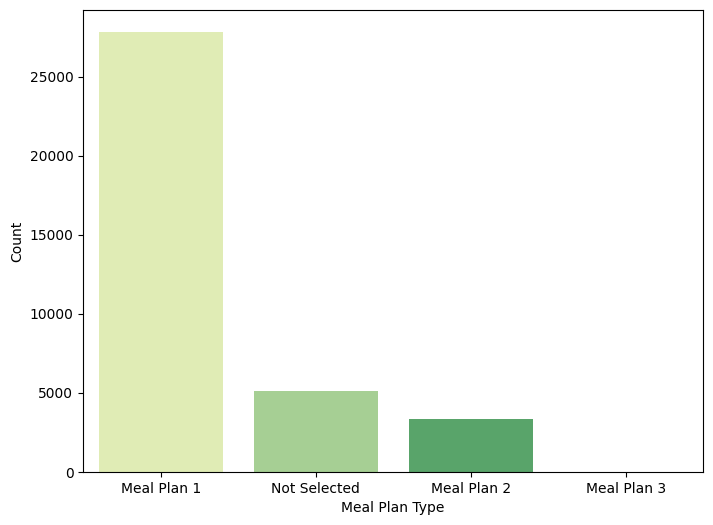

In [ ]:
#Creating a countplot of the types of meals plans chosen.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "type_of_meal_plan", palette = "YlGn")
plt.xlabel("Meal Plan Type")
plt.ylabel("Count")
plt.show()

Most bookings selected Meal Plan 1 (breakfast only), followed at much lesser numbers by Meal Plan 2 (no meal plan chosen). Almost no one chose Meal Plan 3 (breakfast, lunch, and dinner).

6. "required_car_parking_space"

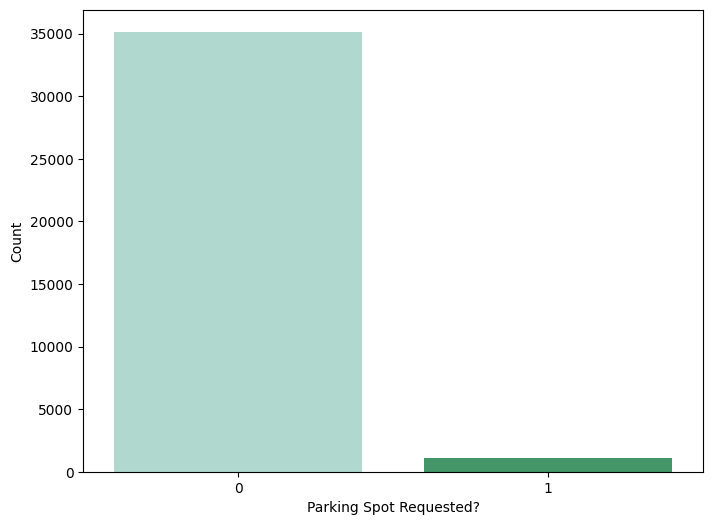

In [ ]:
#Creating a countplot showing if parking spaces were required or not.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "required_car_parking_space", palette = "BuGn")
plt.xlabel("Parking Spot Requested?")
plt.ylabel("Count")
plt.show()

The overwhelming majority of bookings did not require parking spaces (0).

7. "room_type_reserved"

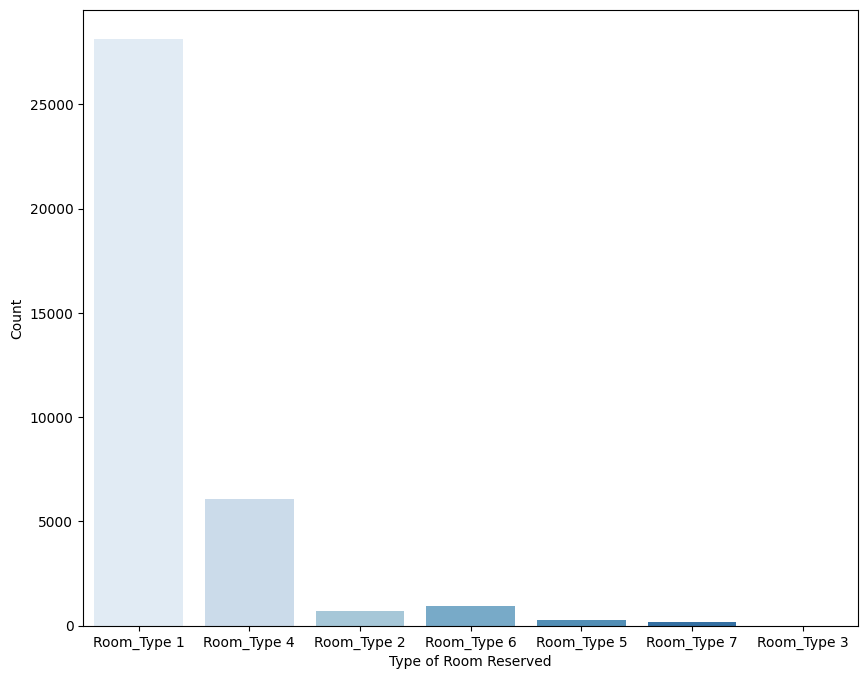

In [ ]:
#Creating a countplot showing the types of rooms reserved.

plt.figure(figsize = (10,8))
sns.countplot(data = df, x = "room_type_reserved", palette = "Blues")
plt.xlabel("Type of Room Reserved")
plt.ylabel("Count")
plt.show()

The room types are encoded, so all we can see is that "Room Type 1" was by far the most reserved.

8. "lead_time"

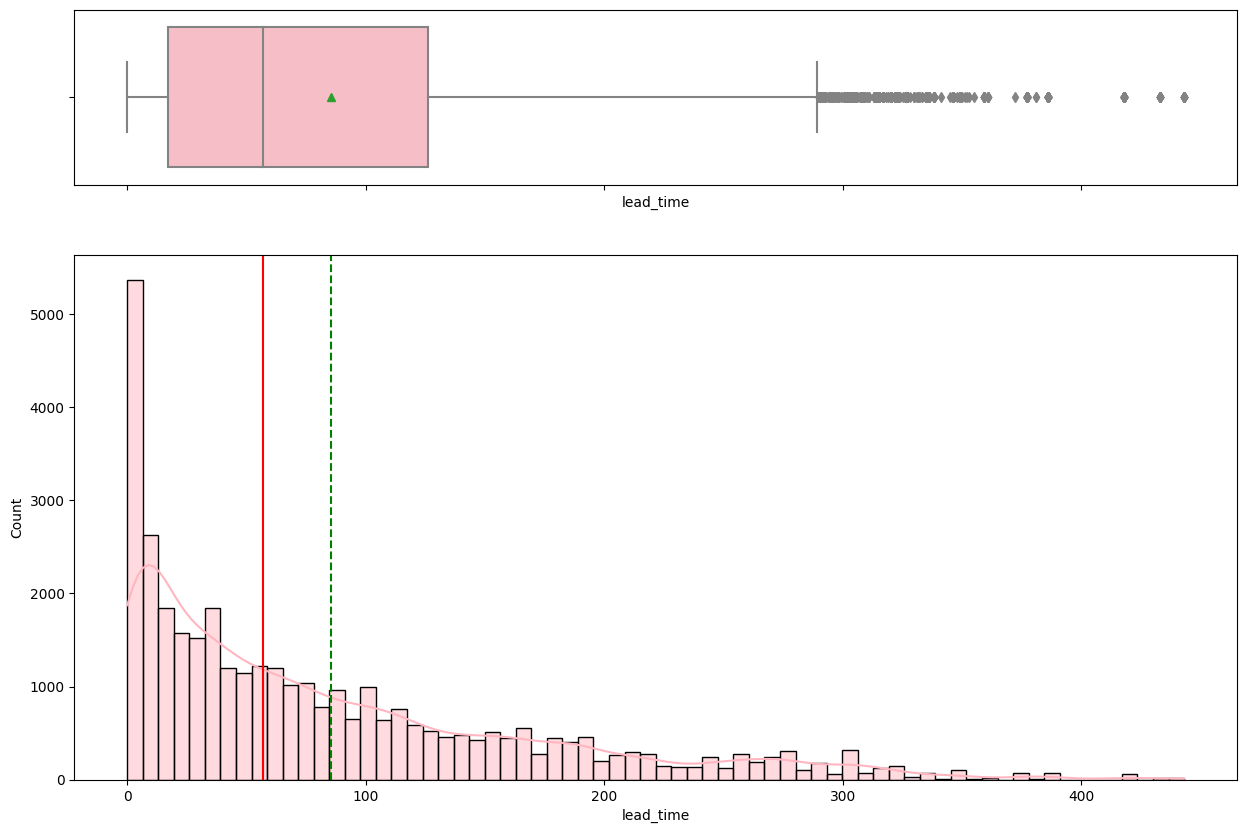

In [ ]:
#Creating a box plot and histogram to show the lead time data distribution.

histoBoxplot(df, "lead_time")

The mean lead time is about 85 days, and the median lead time is about 57 days. There are a lot of outliers on the right side, meaning many guests booked significantly ahead of time. However, most guests booked with no (or a very short) lead time.

9. "arrival_month"

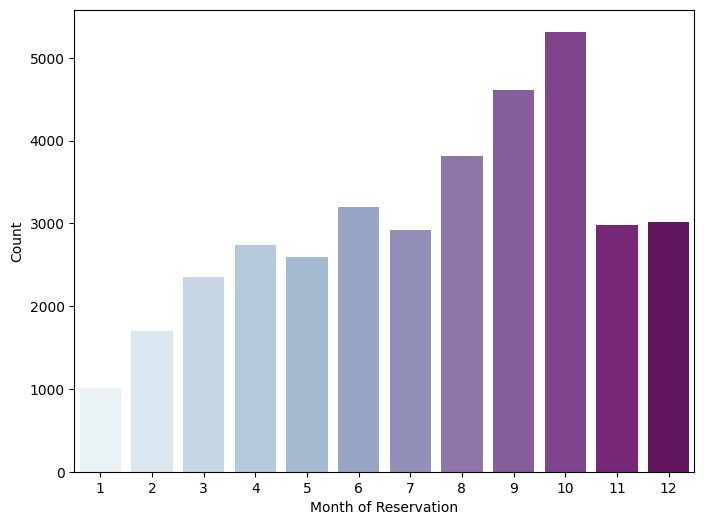

In [ ]:
#Creating a countplot showing what months guests arrived the most.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "arrival_month", palette = "BuPu")
plt.xlabel("Month of Reservation")
plt.ylabel("Count")
plt.show()

October (10) is the most popular month to arrive for reservations, while January (1) is the least popular.

10. "market_segment_type"

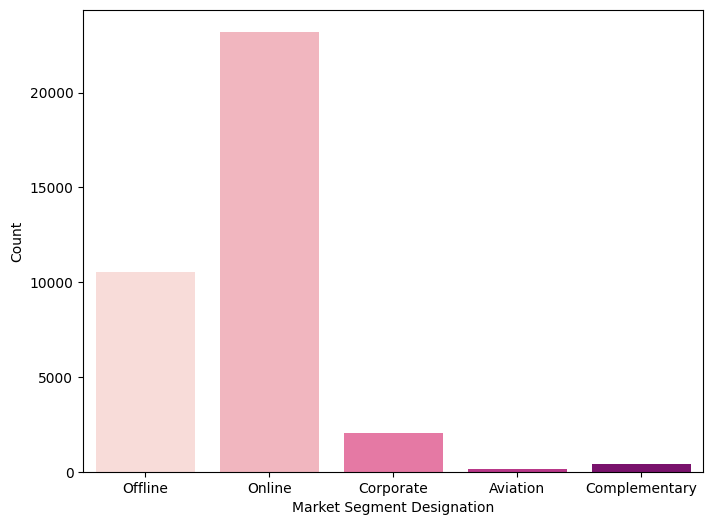

In [ ]:
#Creating a countplot showing the market segment designations.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "market_segment_type", palette = "RdPu")
plt.xlabel("Market Segment Designation")
plt.ylabel("Count")
plt.show()

"Online" is the most common market segment designation.

11. "repeated_guest"

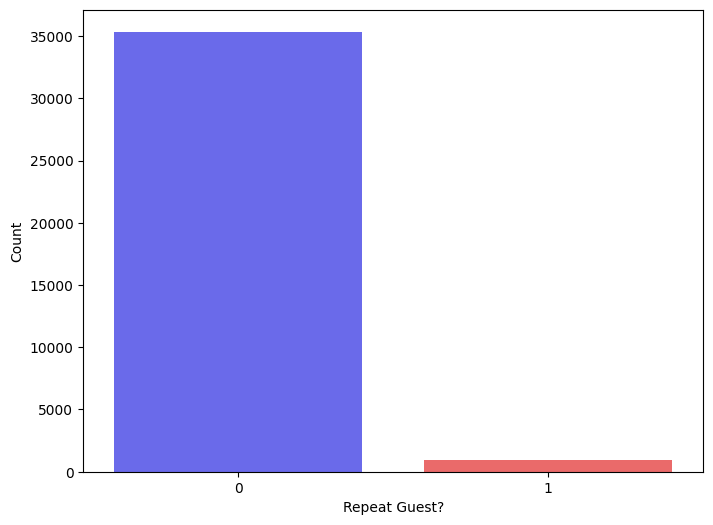

In [ ]:
#Creating a countplot to show how many guests are repeats (or not).

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "repeated_guest", palette = "seismic")
plt.xlabel("Repeat Guest?")
plt.ylabel("Count")
plt.show()

The overwhelming majority of guests have never stayed at the INN Hotels before (they are not repeat guests - 0).

12. "no_of_previous_cancellations"

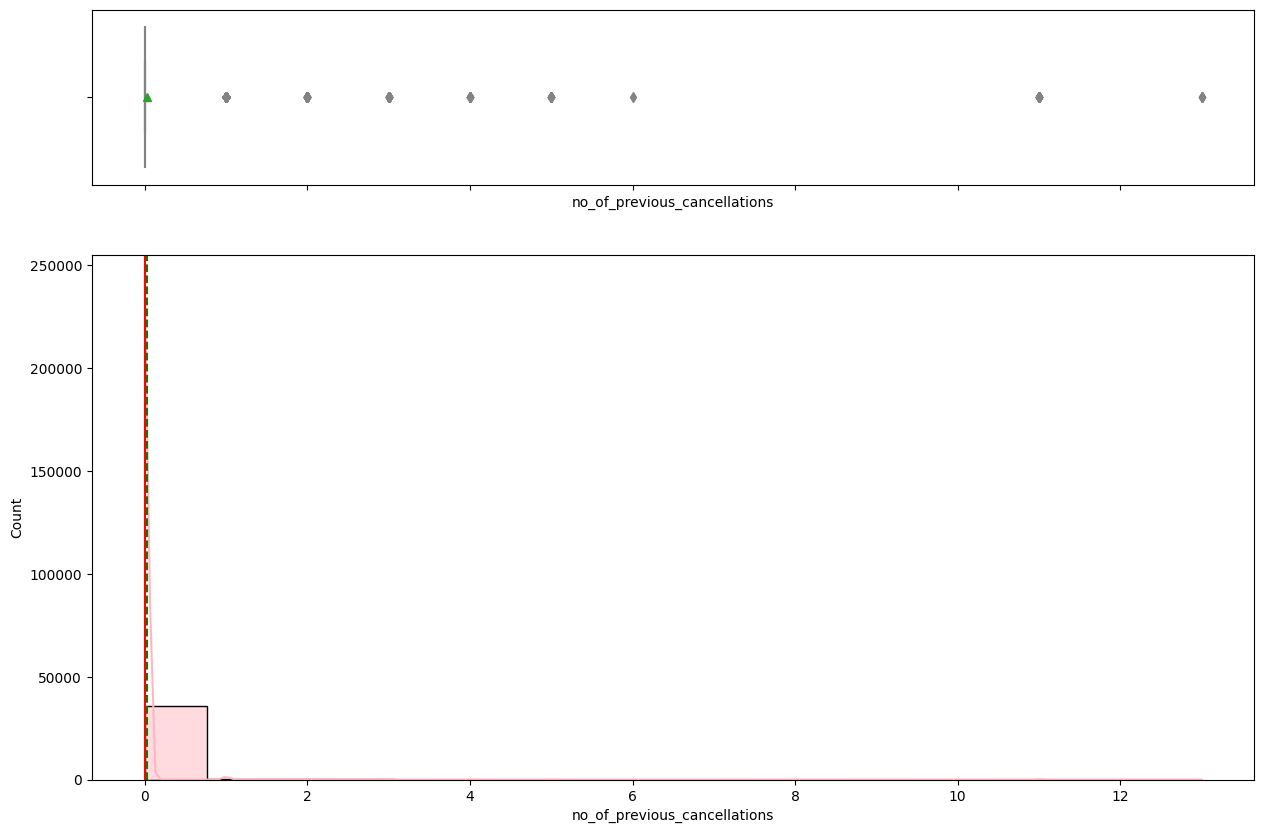

In [ ]:
#Creating a box plot and histogram to show the data distribution of previous cancelations.

histoBoxplot(df, "no_of_previous_cancellations")

Since most guests have never booked at the INN Hotels, it makes sense that both the mean, median, and mode number of cancellations is 0. However, there appear to be some guests that have cancelled an exceeding number of times (up to 13)!

13. "no_of_previous_bookings_not_canceled"

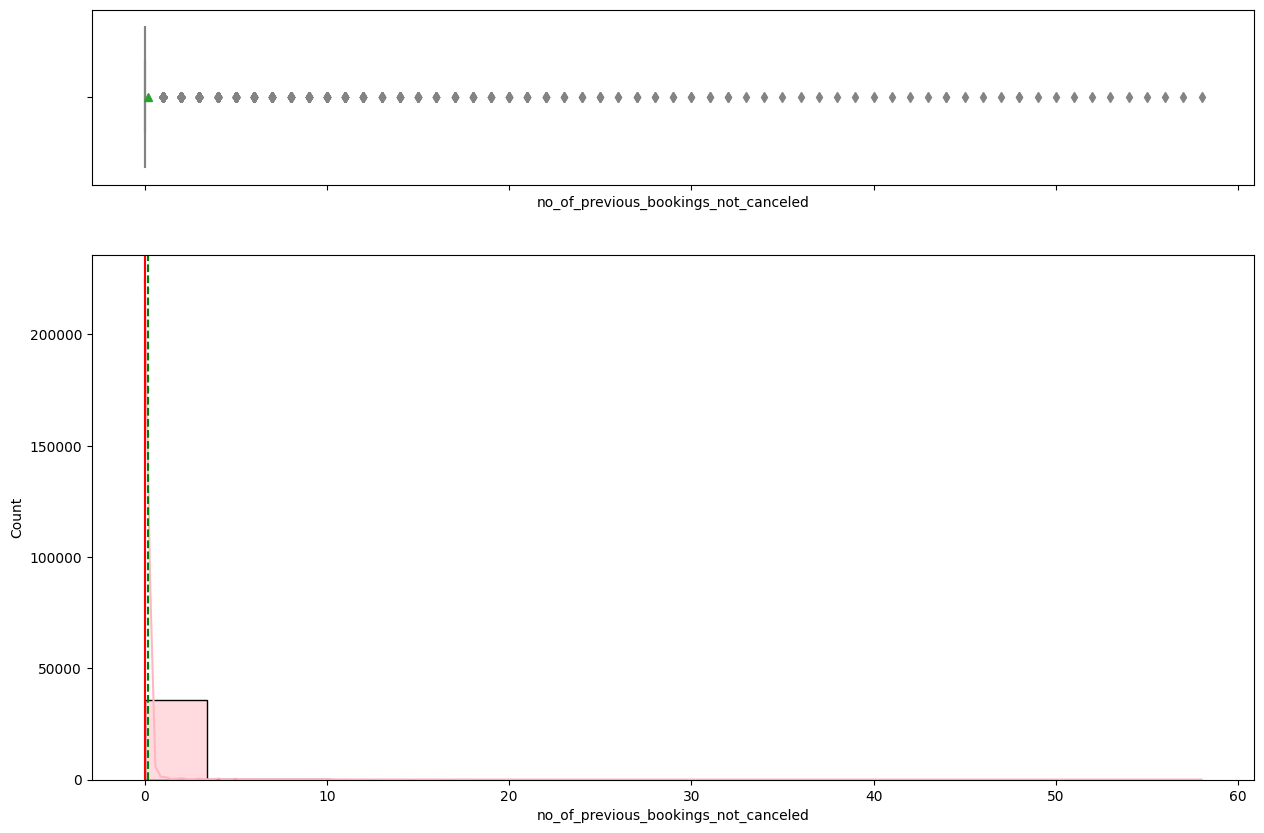

In [ ]:
#Creating a box plot and histogram to show the data distribution of previous NON-cancelations.

histoBoxplot(df, "no_of_previous_bookings_not_canceled")

Again, most of the guests in this data set are new to INN Hotels, so it makes sense that the number of bookings attended *prior* to the current (first one, for many) is zero.

14. "avg_price_per_room"

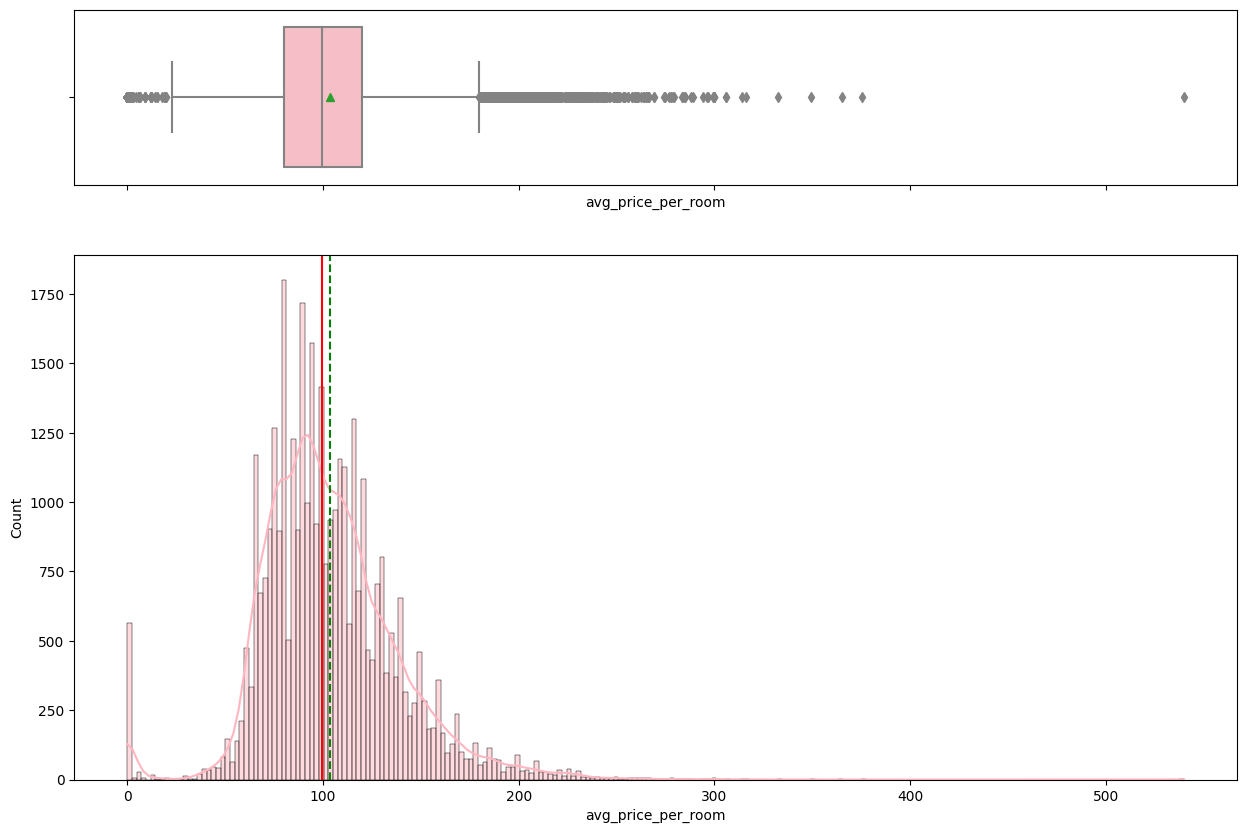

In [ ]:
#Creating a box plot and histogram to show the data distribution of average room prices.

histoBoxplot(df, "avg_price_per_room")

Both the mean and median room price is about €100/day. While it makes sense that there are many rooms significantly more expensive than others (size, view, etc.), there appear to be multiple instances of rooms being free (€0/day). This is likely those "Complimentary" rooms seen in the market segment type column.

15. "no_of_special_requests"

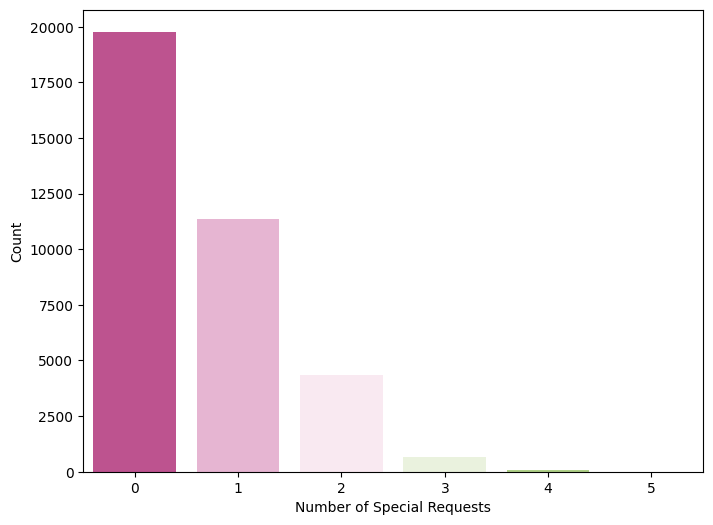

In [ ]:
#Creating a countplot to show how many special requests are received from the guests.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "no_of_special_requests", palette = "PiYG")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count")
plt.show()

Most guests did not make any special requests, but many did make only one.

16. "booking_status"

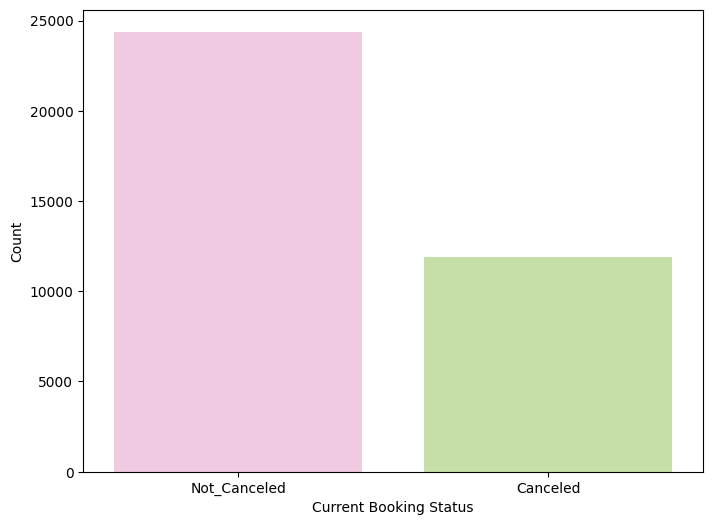

In [ ]:
#Creating a countplot to show current booking status.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "booking_status", palette = "PiYG")
plt.xlabel("Current Booking Status")
plt.ylabel("Count")
plt.show()

Most guests did not cancel their reservation.

### Bivariate Analysis

*1. What are the busiest months in the hotel?*

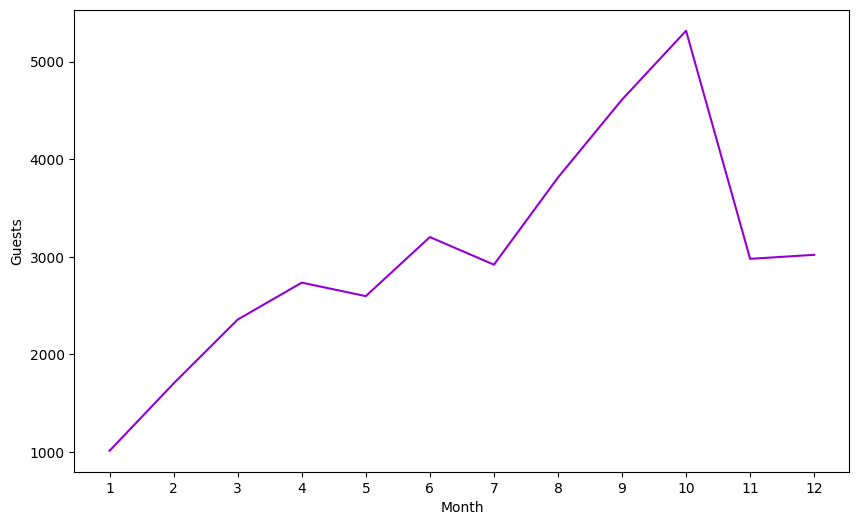

In [ ]:
#Grouping the data by "arrival_month" and "booking_status", and getting the value counts for each month.
monthCount = df.groupby(["arrival_month"])["booking_status"].count()

#Creating a dataframe with months and count of guests in each month.
monthCount = pd.DataFrame(
    {"Month": list(monthCount.index), "Guests": list(monthCount.values)}
)

#Creating a line plot for the months and their respective guest counts.
plt.figure(figsize=(10, 6))
linePlot = sns.lineplot(data = monthCount, x = "Month", y = "Guests", color = "darkviolet")
linePlot.set_xticks(monthCount["Month"].unique())
plt.show()

The top three busiest months are:
* 8 - August
* 9 - Septermber
* 10 - October

*2. Which market segment do most of the guests come from?*

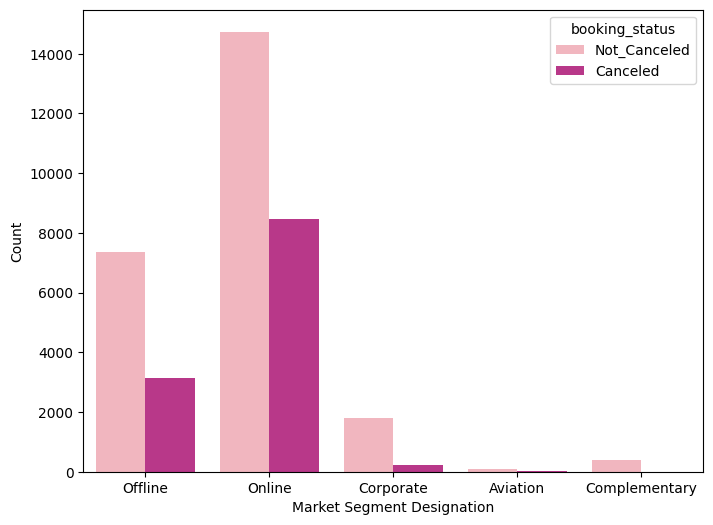

In [ ]:
#Creating a countplot showing the market segment designations, with hue of booking status.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "market_segment_type", hue = "booking_status", palette = "RdPu")
plt.xlabel("Market Segment Designation")
plt.ylabel("Count")
plt.show()

Most of the guests come from the "online" market segment, followed by the "offline" one.

*3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?*

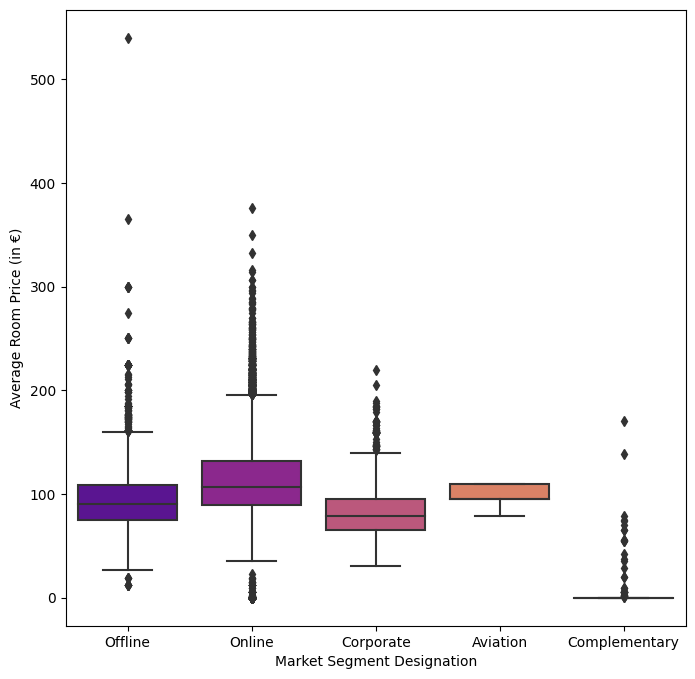

In [ ]:
#Creating a boxplot of the room price distributions for the market segment types.

plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = "market_segment_type", y = "avg_price_per_room", palette = "plasma")
plt.xlabel("Market Segment Designation")
plt.ylabel("Average Room Price (in €)")
plt.show()

"Online" has the most expensive rooms per quartiles (except for aviation in Q1 and Q2), but has offered a few rooms at cheaper than expected prices. All MSTs offer these deals, expect for aviation, which seems to have a cap on prices and no unusually cheap or expensive rooms. "Complementary" strangely has rooms that cost anything more than €0.

*4. What percentage of bookings are canceled each month?*

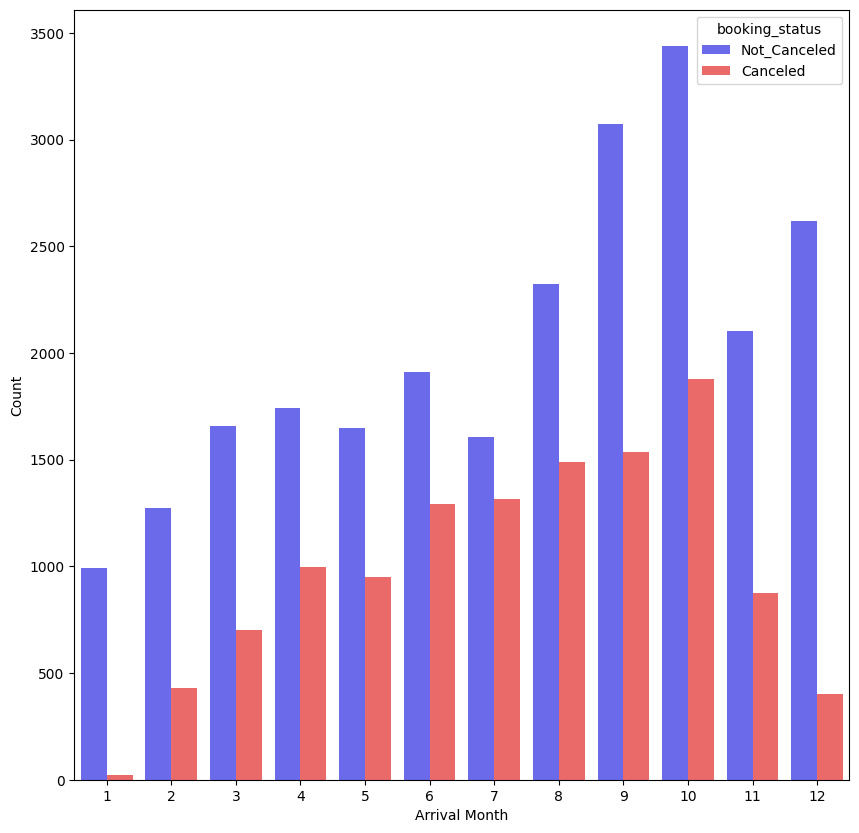

In [ ]:
#Creating a countplot showing the arrival month, with hue of booking status.

plt.figure(figsize = (10,10))
sns.countplot(data = df, x = "arrival_month", hue = "booking_status", palette = "seismic")
plt.xlabel("Arrival Month")
plt.ylabel("Count")
plt.show()

In [ ]:
#Displaying the canceled/not canceled ratios as percents, with the above visual to aid.

df.groupby(["arrival_month"])["booking_status"].value_counts(normalize = True)

arrival_month  booking_status
1              Not_Canceled     0.97633
               Canceled         0.02367
2              Not_Canceled     0.74765
               Canceled         0.25235
3              Not_Canceled     0.70314
               Canceled         0.29686
4              Not_Canceled     0.63633
               Canceled         0.36367
5              Not_Canceled     0.63510
               Canceled         0.36490
6              Not_Canceled     0.59694
               Canceled         0.40306
7              Not_Canceled     0.55000
               Canceled         0.45000
8              Not_Canceled     0.60976
               Canceled         0.39024
9              Not_Canceled     0.66645
               Canceled         0.33355
10             Not_Canceled     0.64642
               Canceled         0.35358
11             Not_Canceled     0.70638
               Canceled         0.29362
12             Not_Canceled     0.86693
               Canceled         0.13307
Name: book

January (1) has the best non-cancelation/cancelation ratio: ~98% to ~2%.

July (7) has the worst: 55% to 45%.

**NOTE: I thought this question was for bivariate analysis like the rest of the questions, so I added "per month" to make it bivariate rather than univariate analysis.*

*5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?*

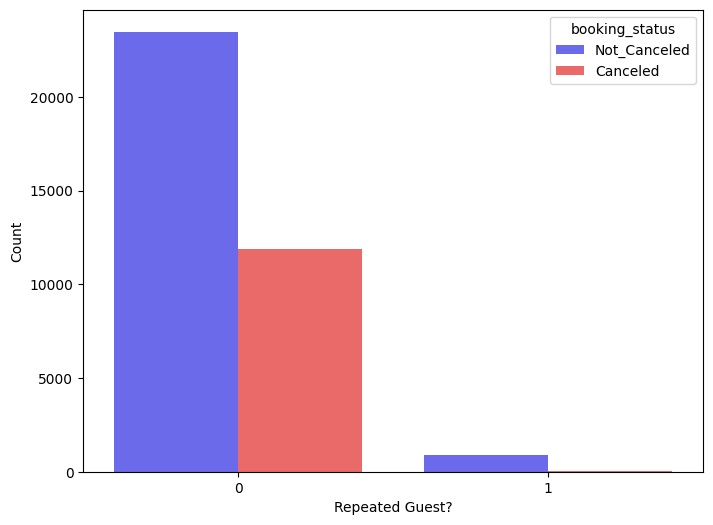

In [ ]:
#Creating a countplot showing the proportion of repeated guests to new, with hue of booking status.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "repeated_guest", hue = "booking_status", palette = "seismic")
plt.xlabel("Repeated Guest?")
plt.ylabel("Count")
plt.show()

In [ ]:
#Displaying the canceled/not canceled ratios as percents, with the above visual to aid.

df.groupby(["repeated_guest"])["booking_status"].value_counts(normalize = True)

repeated_guest  booking_status
0               Not_Canceled     0.66420
                Canceled         0.33580
1               Not_Canceled     0.98280
                Canceled         0.01720
Name: booking_status, dtype: float64

Of repeated guests, ~1.7% have canceled their reservation.

*6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?*

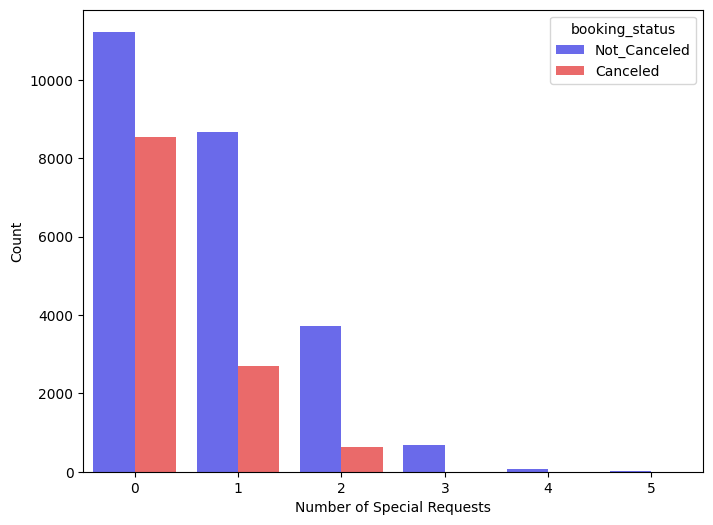

In [ ]:
#Creating a countplot to show how many special requests were received from the guests, with hue of booking status.

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "no_of_special_requests", hue = "booking_status", palette = "seismic")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count")
plt.show()

In [ ]:
#Displaying the canceled/not canceled ratios as percents, with the above visual to aid.

df.groupby(["no_of_special_requests"])["booking_status"].value_counts(normalize = True)

no_of_special_requests  booking_status
0                       Not_Canceled     0.56793
                        Canceled         0.43207
1                       Not_Canceled     0.76233
                        Canceled         0.23767
2                       Not_Canceled     0.85403
                        Canceled         0.14597
3                       Not_Canceled     1.00000
4                       Not_Canceled     1.00000
5                       Not_Canceled     1.00000
Name: booking_status, dtype: float64

Just from looking at the %, it does appear that more special requests made it more likely that the guests would *not* cancel their reservation.

0 Requests -> ~43% cancelation rate

1 Requests -> ~24% cancelation rate

2 Requests -> ~15% cancelation rate

3+ Requests -> 0% cancelation rate

7. "no_of_special_requests" vs. "avg_price_per_room"

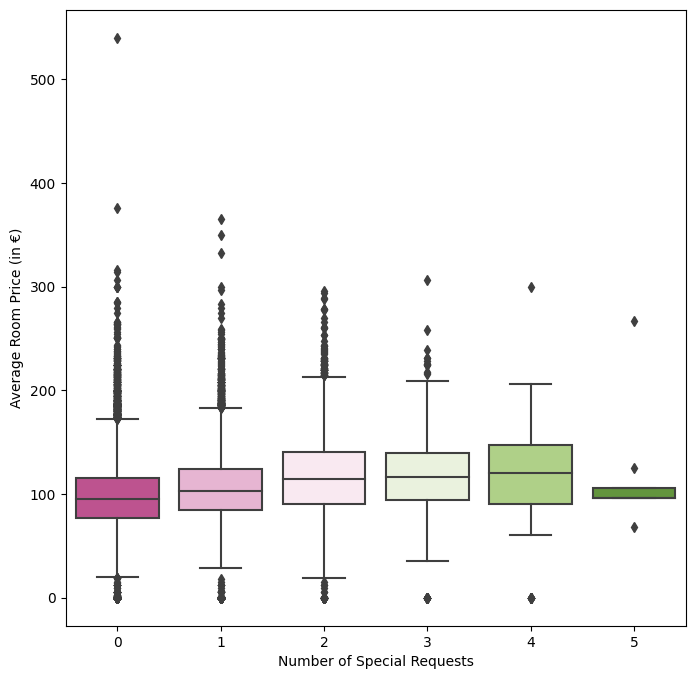

In [ ]:
#Creating a boxplot of the room price distributions for the number of special requests.

plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = "no_of_special_requests", y = "avg_price_per_room", palette = "PiYG")
plt.xlabel("Number of Special Requests")
plt.ylabel("Average Room Price (in €)")
plt.show()

As expected, the more special requests the guests make, the higher median price of the room per day. However, it appears that any room above about €240/day is considered unusually expensive, regardless of number of special requests. One thing to note is that all the rooms with 5 special requests seem to cost around €100/day.

8. "arrival_month" vs. "avg_price_per_room"

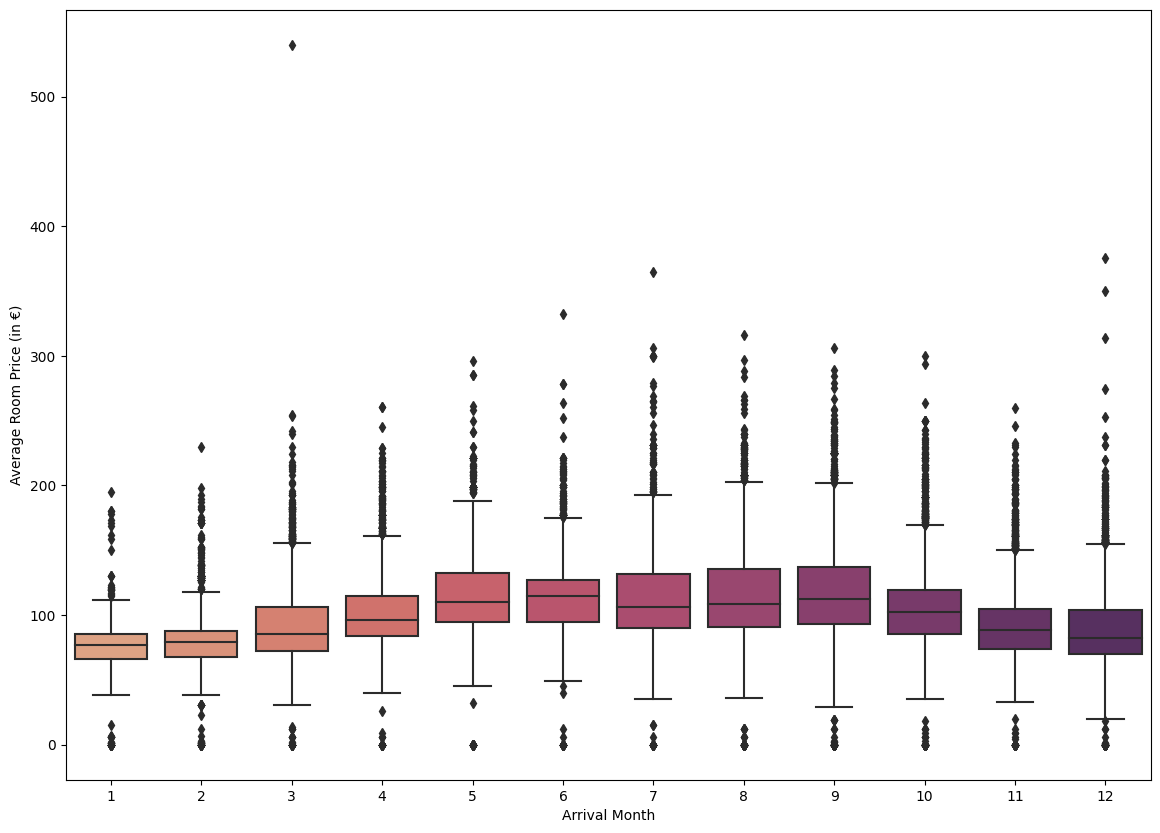

In [ ]:
#Creating a boxplot of the room price distributions for each month.

plt.figure(figsize = (14, 10))
sns.boxplot(data = df, x = "arrival_month", y = "avg_price_per_room", palette = "flare")
plt.xlabel("Arrival Month")
plt.ylabel("Average Room Price (in €)")
plt.show()

From previous analyses we know that October (10) is the most booked month, yet the month with the highest median price per day is June (6). The genreal pattern appears to be lower prices at the beginning of the year steadily increasing until about halfway through the year, then steadily decreasing until the end of the year.

8. "type_of_meal_plan" vs. "avg_price_per_room"

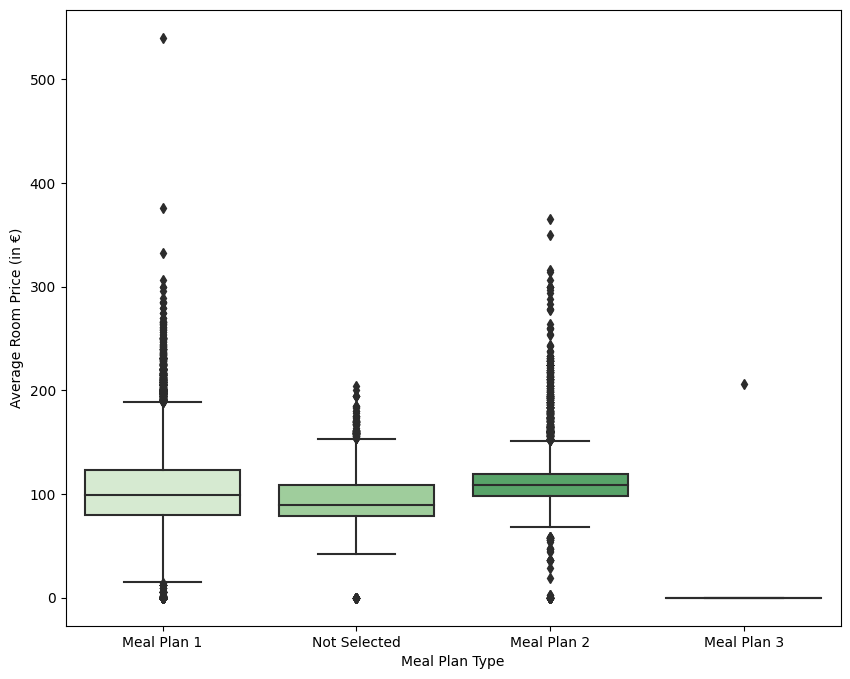

In [ ]:
#Creating a boxplot of the room price distributions for teach type of meal plan.

plt.figure(figsize = (10, 8))
sns.boxplot(data = df, x = "type_of_meal_plan", y = "avg_price_per_room", palette = "Greens")
plt.xlabel("Meal Plan Type")
plt.ylabel("Average Room Price (in €)")
plt.show()

Strangely, reservations that did not select a meal plan have higher starting price per day, but the median daily price is lower than of that with MP1 or MP2. As expected, MP2 has the highest daily prices. Almost no one chose MP3, so we don't have enough data to see a pattern, expect that it is not a popular choice.

9. heatmap

In [ ]:
#Creating a list of all numerical columns.

numCols = df.select_dtypes(include = np.number).columns.tolist()

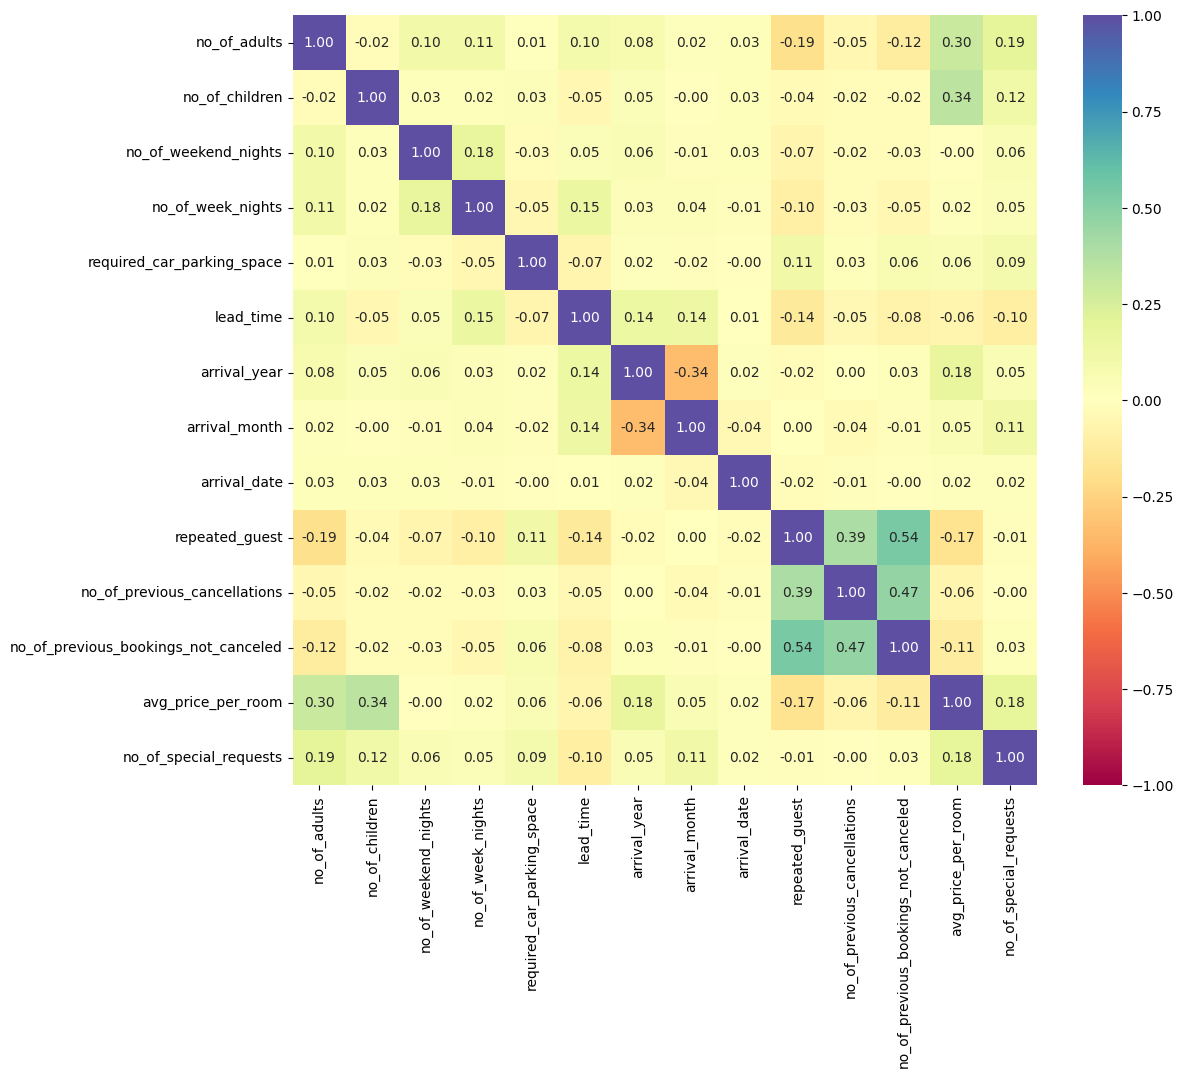

In [ ]:
#Creating a heatmap to see correlations between the numerical columns.

plt.figure(figsize = (12,10))
sns.heatmap(data = df[numCols].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.show()

* The highest correlation is between "repeated_guest" and "no_of_previous_bookings_not_canceled" (54%). This makes sense; if they are a previous guest, it means they could have attended a previous booking.
* Similarly, previous guests had the opportunity to cancel a previous booking, and about 39% of them did.
* Previous cancelation and non-cancelations also had a 47% positive correlation.
* Obviously, number of individuals increased the price per day of the booking (30% and 34%).
* The highest negative correlation is between arrival month and year, but this misrepresents the data as they separated the date into individual categories.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###Missing Value Treatment

There are no missing values, so no treatment is necessary.

###Feature Engineering

In [ ]:
#Creating a copy of the original data frame so it is not altered.

df0 = df.copy()

In [ ]:
#"Booking_ID" is not a necessary column, so we can drop it.

df1 = df0.drop("Booking_ID", axis = 1)

In [ ]:
#Checking to make sure the column was dropped.

df1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
#Converting "booking_status" values into 0 or 1.

df1["booking_status"] = df1["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [ ]:
#Checking to make sure the column values were changed.

df1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


###Outlier Detection and Treatment

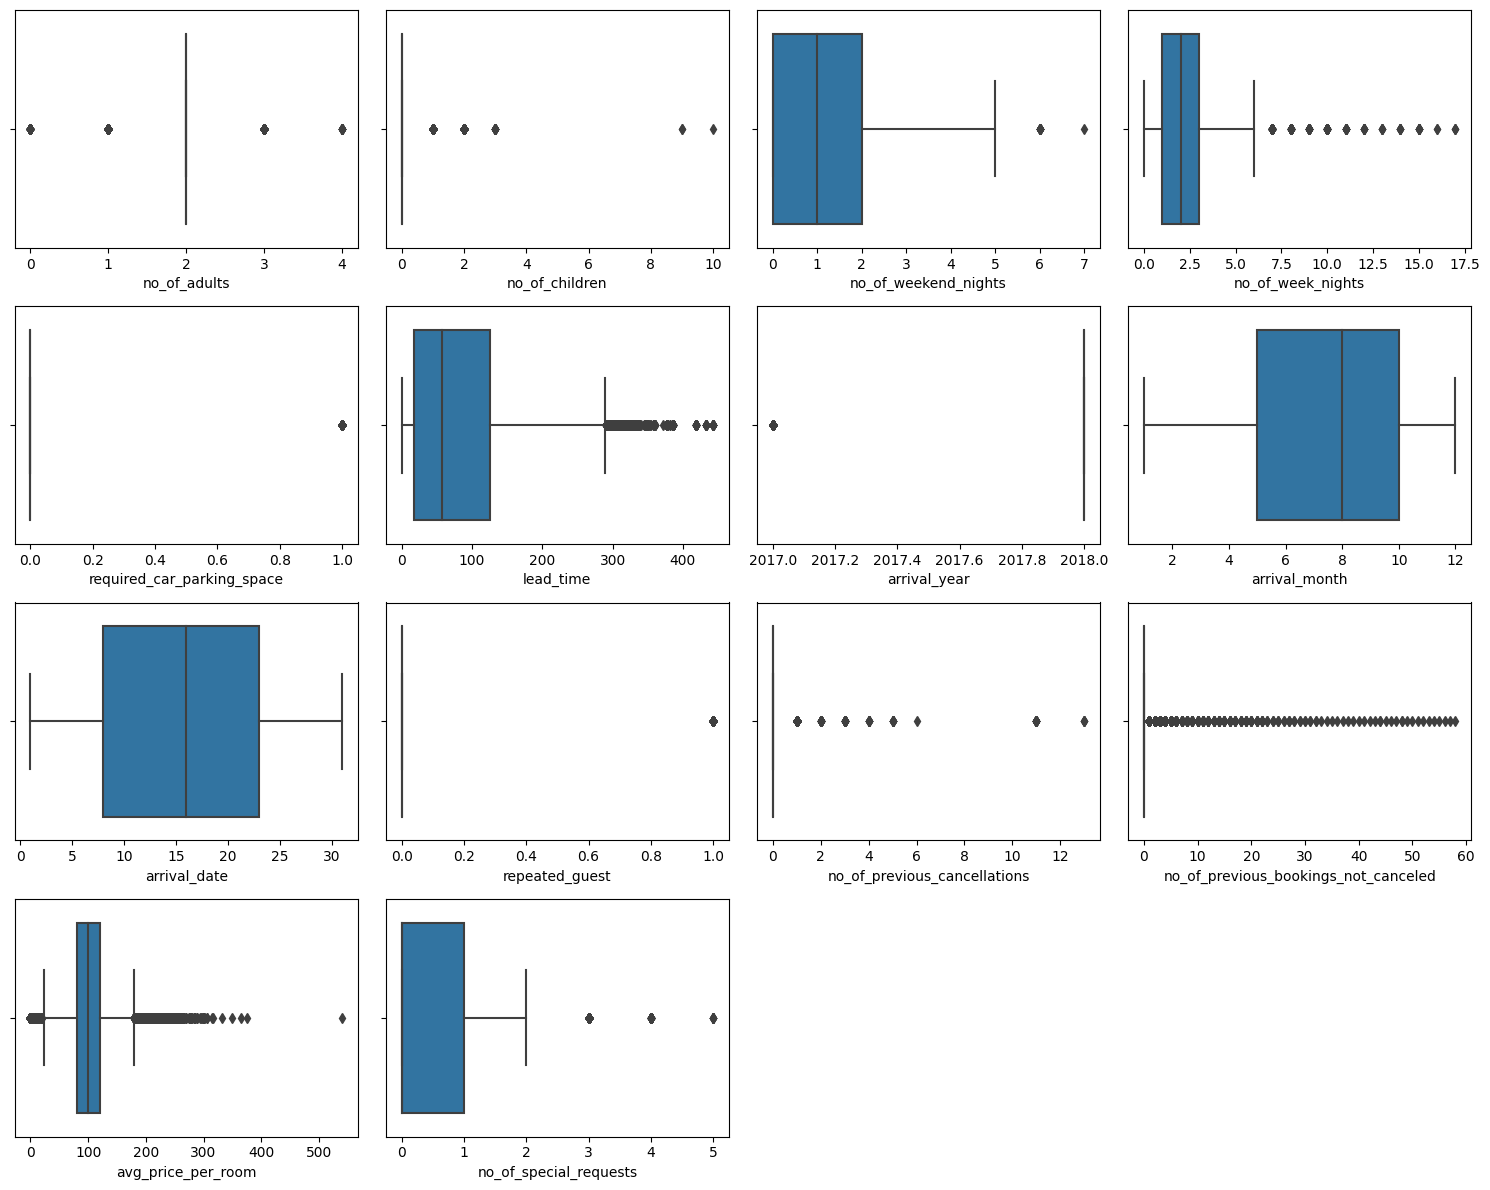

In [ ]:
#Using numCols to create a grid of the outliers of the numerical variables.

plt.figure(figsize = (15, 12))

#Make a for loop that graphs each column.
for i, variable in enumerate(numCols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df1, x = variable)
    plt.tight_layout()

plt.show()

While the outliers for most columns seem reasonable within context, we can fix the one extremely high outlier for "avg_price_per_room" and the two for "no_of_children". There are a few columns where the value can be ither 0 or 1, so those outliers are to be left alone.

In [ ]:
#Calculating the 25th quantile.
Q1 = df["avg_price_per_room"].quantile(0.25)

#Calculating the 75th quantile.
Q3 = df["avg_price_per_room"].quantile(0.75)

#Calculating the IQR.
IQR = Q3 - Q1

#Calculating value of upper whisker.
upperWhisker = Q3 + 1.5 * IQR
upperWhisker

179.55

In [ ]:
#Assigning the outliers the value of upper whisker.

df1.loc[df1["avg_price_per_room"] >= 500, "avg_price_per_room"] = upperWhisker

In [ ]:
#Checking to make sure the highest outlier was replaced.

df1["avg_price_per_room"].max()

375.5

In [ ]:
#Replacing the extreme outliers in number of children.

df1["no_of_children"] = df1["no_of_children"].replace([9, 10], 3)

In [ ]:
#Checking to make sure the highest outlier was replaced.

df1["no_of_children"].max()

3

###Preparing Data for Modeling

The data must be randomly split into training (70%) and testing (30%) sets. Dummy variables for categorical columns must also be created. I will first import the necessary libraries.

In [ ]:
#Importing library to split data.
from sklearn.model_selection import train_test_split

#To build model for prediction.
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To tune different models.
from sklearn.model_selection import GridSearchCV

#To get diferent metric scores.
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
#Creating the dependent and independent variables.
X = df1.drop(["booking_status"], axis = 1)
y = df1["booking_status"]

print(X.head())
print()
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

In [ ]:
#Adding the constant to X.

X = sm.add_constant(X)

In [ ]:
#Creating dummy variables for the categorical/object columns.

X = pd.get_dummies(X, columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(), drop_first = True)
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Splitting the data set into 70:30 train/test sets.

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print("Number of rows in train data =", xTrain.shape[0])
print("Number of rows in test data =", xTest.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


## EDA

- It is a good idea to explore the data once again after manipulating it.

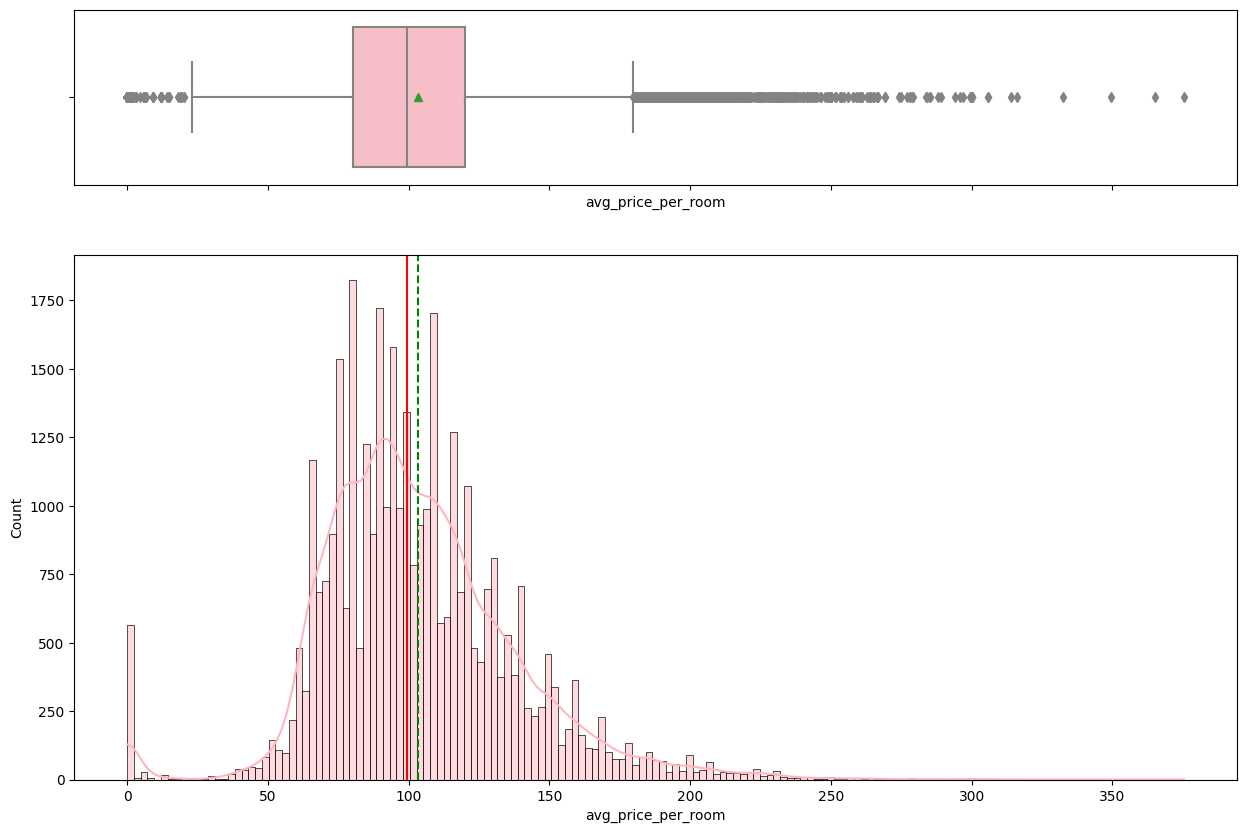

In [ ]:
#Checking the box plot and histogram of average room prices after outlier treatment.

histoBoxplot(df1, "avg_price_per_room")

The data is a lot less right-skewed now; the removed outlier was heavily affecting this column.

## Building a Logistic Regression model

In [ ]:
#Building the model.
logit = sm.Logit(yTrain, xTrain.astype(float))

#Fitting the model onto the data.
lg = logit.fit(disp = False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.3292
Time:                        03:16:37   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
#Defining a function to check VIF for all the columns.
def checkVIF(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    #Calculating VIF for each column.
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

    return vif

In [ ]:
checkVIF(xTrain)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


Ignoring the scores of the dummy variables and the constant, it appears no multicollinearity is present in the variables.

## Dropping High p-values

We can drop predictors that have a p-value > 0.05, since they do not significantly impact the target variable. However, we must do it one by one, as the other p-values may change.

In [ ]:
#Dropping the predictor with the highets p-value.
xTrain0 = xTrain.drop(["arrival_date"], axis = 1)

#Checking to make sure the column was dropped.
xTrain0.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1.00000,1,0,0,1,0,163,2018,10,0,0,0,115.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26641,1.00000,2,0,0,3,0,113,2018,3,0,0,0,78.15000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
17835,1.00000,2,0,2,3,0,359,2018,10,0,0,0,78.00000,1,0,0,0,0,0,0,0,0,0,0,0,1,0
21485,1.00000,2,0,0,3,0,136,2018,6,0,0,0,85.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5670,1.00000,2,0,1,2,0,21,2018,8,0,0,0,151.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Running the model again.

logit0 = sm.Logit(yTrain, xTrain0.astype(float))
lg0 = logit0.fit(disp = False)

print(lg0.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.3292
Time:                        03:16:40   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.7870    120.837     -7.637      0.000   -1159.623    -685.951
no_of_adults                             0.1140      

In [ ]:
#Dropping the next predictor with the highets p-value.

xTrain01 = xTrain0.drop(["no_of_previous_bookings_not_canceled"], axis = 1)
xTrain01.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1.00000,1,0,0,1,0,163,2018,10,0,0,115.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26641,1.00000,2,0,0,3,0,113,2018,3,0,0,78.15000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
17835,1.00000,2,0,2,3,0,359,2018,10,0,0,78.00000,1,0,0,0,0,0,0,0,0,0,0,0,1,0
21485,1.00000,2,0,0,3,0,136,2018,6,0,0,85.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5670,1.00000,2,0,1,2,0,21,2018,8,0,0,151.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Running the model again.

logit01 = sm.Logit(yTrain, xTrain01.astype(float))
lg01 = logit01.fit(disp = False)

print(lg01.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.3291
Time:                        03:16:41   Log-Likelihood:                -10795.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -921.1047    120.846     -7.622      0.000   -1157.959    -684.251
no_of_adults                          0.1140      0.038      3

"arrival_date" and "no_of_previous_bookings_not_canceled" have been dropped.

In [ ]:
#Making updated X testing and training data sets using the remaining columns.

xTrain1 = xTrain.drop(["arrival_date", "no_of_previous_bookings_not_canceled"], axis = 1)
xTest1 = xTest.drop(["arrival_date", "no_of_previous_bookings_not_canceled"], axis = 1)

In [ ]:
#Building the new model.
logit1 = sm.Logit(yTrain, xTrain1.astype(float))

#Fitting the model onto the data.
lg1 = logit1.fit(disp = False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.3291
Time:                        03:16:42   Log-Likelihood:                -10795.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -921.1047    120.846     -7.622      0.000   -1157.959    -684.251
no_of_adults                          0.1140      0.038      3

We now have a model with no multicollinearity and no high p-values.

## Final Model Summary

In [ ]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.3291
Time:                        03:16:42   Log-Likelihood:                -10795.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -921.1047    120.846     -7.622      0.000   -1157.959    -684.251
no_of_adults                          0.1140      0.038      3

Given that the coefficients of the regression function are in log(odd) format, we must convert them to interpret them better.

In [ ]:
#Converting the coefficients to odds.
odds = np.exp(lg1.params)

#Calculating the percent change.
percentChange = (np.exp(lg1.params) - 1) * 100

#Removing the limit of number of columns that can be displyed.
pd.set_option("display.max_columns", None)

#Creating dataframe with odds.
pd.DataFrame({"Odds": odds, "Change in odds (%)": percentChange}, index = xTrain1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
Odds,0.00000,1.12074,1.17149,1.11268,1.04046,0.20314,1.01583,1.57655,0.95909,0.06385,1.25809,1.01899,0.23009,1.19120,46139966.19195,1.32131,0.69750,0.99652,0.75407,0.48739,0.38650,0.24646,0.00000,0.30145,0.11104,0.66865
Change in odds (%),-100.00000,12.07367,17.14950,11.26816,4.04633,-79.68610,1.58345,57.65550,-4.09105,-93.61524,25.80862,1.89865,-76.99106,19.12022,4613996519.19466,32.13130,-30.25036,-0.34786,-24.59251,-51.26114,-61.34968,-75.35402,-100.00000,-69.85467,-88.89569,-33.13495


Predictors that ***increase*** likelihood of the booking being canceled (1):
* no_of_adults (by 12.1%)
* no_of_kids (by 17%)
* no_of_weekend_nights (by 11.3%)
* no_of_week_nights (by 4.04%)
* lead_time (1.6%)
* arrival_year (57.7%)
* no_of_previous_cancellations (25.8%)
* avg_price_per_room (1.9%)
* Meal Plan 2, Meal Plan 3, or no meal plan

Predictors that ***decrease*** likelihood of the booking being canceled (0):
* required_car_parking_space (80%)
* arrival_month (4.1%)
* repeated_guest (93.6%)
* no_of_special_requests (77%)
* Room Types 2, 3, 4, 5, 6, 7
* All market segments left

***Percents are true when all other values are held at a constant and the specified value increases by a unit of 1.


## Model performance evaluation

In [ ]:
#Defining a function to compute different metrics to check performance of the classification model.
def modelPerform(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    #Checking which probabilities are greater than the threshold.
    predVal = model.predict(predictors) > threshold

    # rounding off the above values to get classes.
    pred = np.round(predVal)

    acc = accuracy_score(target, pred)          #Computing accuracy
    recall = recall_score(target, pred)         #Computing recall
    precision = precision_score(target, pred)   #Computing precision
    f1 = f1_score(target, pred)                 #Computing F1-score

    #Creating a dataframe to display the scores.
    dfPerform = pd.DataFrame(
        {
          "Accuracy": acc,
          "Recall": recall,
          "Precision": precision,
          "F1": f1
        },
        index=[0],
    )

    return dfPerform

In [ ]:
#Checking the performance of the old model.

print("Training performance:")
modelPerform(lg, xTrain, yTrain)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


In [ ]:
#Checking the performance of the new model.

print("Training performance:")
train05 = modelPerform(lg1, xTrain1, yTrain)
train05

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80588,0.63410,0.73940,0.68272


The models have very similar scores across all metrics. It performs well in terms of accuracy, a bit lower in precision, and just decently in recall and F1.

In [ ]:
#Checking the performance of the new model on the testing data.

print("Testing performance:")
test05 = modelPerform(lg1, xTest1, yTest)
test05

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.80493,0.63231,0.72897,0.67721


The model performs about the same on the testing data.

We can visualize the results with a confusion matrix.

In [ ]:
#Defining a function to plot the confusion matrix of the classification model.

def confusionMatrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    yPred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, yPred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot = labels, fmt = "")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

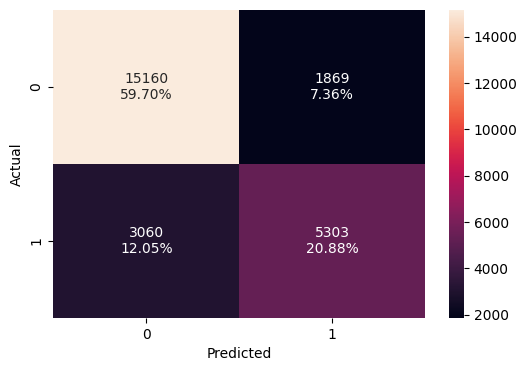

In [ ]:
#Creating the confusion matrix for the new model using the training data set.

confusionMatrix(lg1, xTrain1, yTrain)

## Improvement of Logistic Regression Model

### ROC/AUC

The model could use some serious improvements, especially regarding recall. We can use the ROC Curve and the AUC on the training data set to determine the optimal threshold for optimal performance.

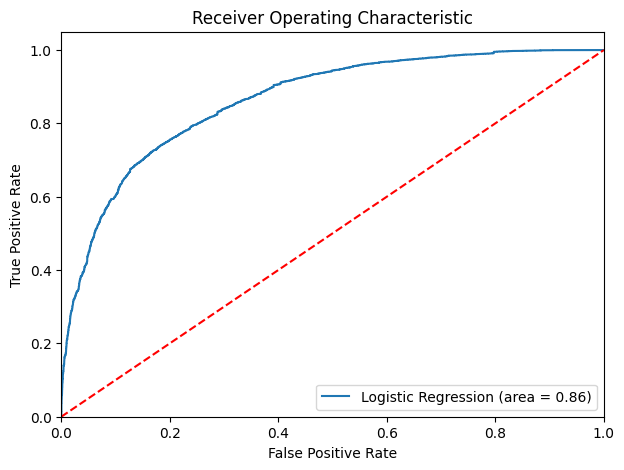

In [ ]:
#Creating the ROC Curve/AUC for the training data set.

rocAUC = roc_auc_score(yTrain, lg1.predict(xTrain1))
fpr, tpr, thresholds = roc_curve(yTrain, lg1.predict(xTrain1))
plt.figure(figsize = (7,5))
plt.plot(fpr, tpr, label = "Logistic Regression (area = %0.2f)" % rocAUC)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

The model is perfoming well on the training data, but there is room for improvement. We can find the optimal threshold from the ROC/AUC (where TPR is highest and FPR is lowest).

In [ ]:
fpr, tpr, thresholds = roc_curve(yTrain, lg1.predict(xTrain1))

optimal_idx = np.argmax(tpr - fpr)
optimalThresh = thresholds[optimal_idx]
print(optimalThresh)

0.3647469531117776


The optimal threshold for classes is 0.365. Let's check the metrics and generate a confusion matrix with this new threshold.

In [ ]:
#Checking the performance of the model with the new threshold.

print("Training performance:")
train036 = modelPerform(lg1, xTrain1, yTrain, threshold = optimalThresh)
train036

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79135,0.74064,0.66438,0.70044


Accuracy has slightly decreased and precison has significantly decreased, but
recall has significantly increased. F1 is about the same, barely increasing. Overall, the model is performing well still.

In [ ]:
#Checking the performance of the model on the testing data with the new threshold.

print("Testing performance:")
test033 = modelPerform(lg1, xTest1, yTest, threshold = optimalThresh)
test033

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.79491,0.74617,0.66263,0.70192


The model performs about the same on the testing data.

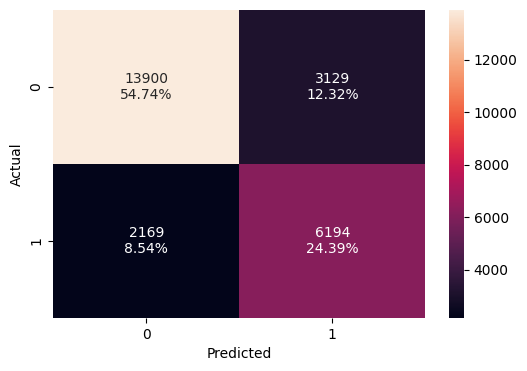

In [ ]:
#Creating the confusion matrix for the model using the training data set and new threshold.

confusionMatrix(lg1, xTrain1, yTrain, threshold = optimalThresh)

### Precision-Recall

We can also use the Precision-Recall Curve to find a better threshold.

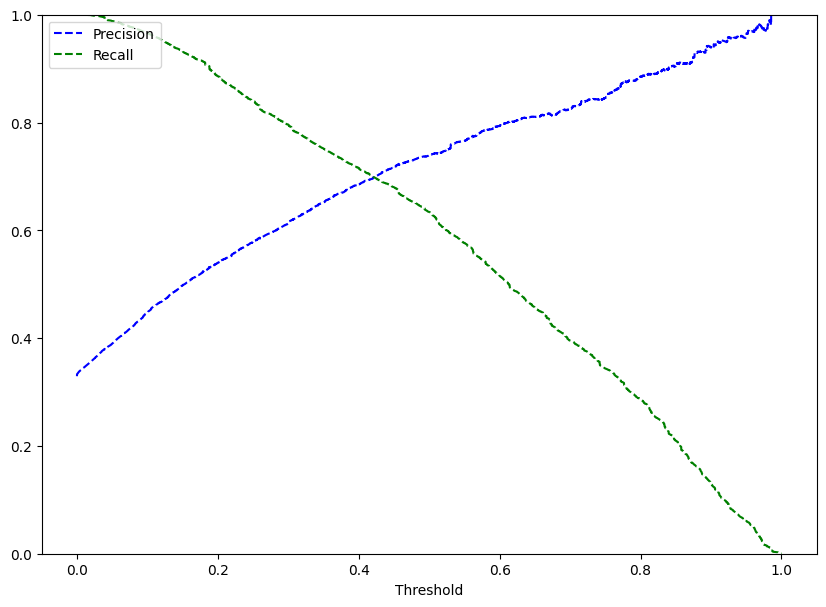

In [ ]:
yScores = lg1.predict(xTrain1)
prec, rec, tre = precision_recall_curve(yTrain, yScores)


def precisionRecall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[: -1], "g--", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
precisionRecall(prec, rec, tre)
plt.show()

In [ ]:
#Declaring the second optimal threshold based on the intersection.

optimalThresh2 = 0.415

In [ ]:
#Checking the performance of the model with the new threshold.

print("Training performance:")
train041 = modelPerform(lg1, xTrain1, yTrain, threshold = optimalThresh2)
train041

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80009,0.70393,0.69365,0.69875


Recall decreased, but all other metrics either stayed relatively the same or increased slightly. The model is performing better.

In [ ]:
#Checking the performance of the model on the testing data with the new threshold.

print("Testing performance:")
test041 = modelPerform(lg1, xTest1, yTest, threshold = optimalThresh2)
test041

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.80226,0.70698,0.68975,0.69826


The model performs about the same on the testing data.

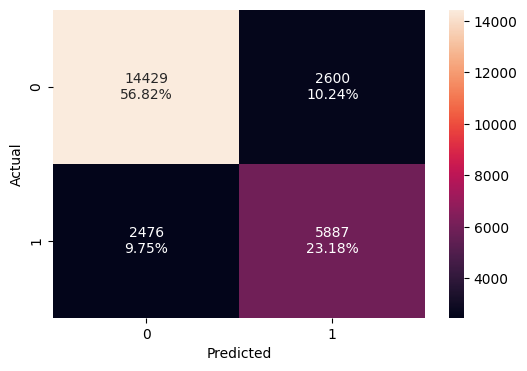

In [ ]:
#Creating the confusion matrix for the model using the training data set and new threshold.

confusionMatrix(lg1, xTrain1, yTrain, threshold = optimalThresh2)

### Comparisons

In [ ]:
#Comparing the training data performances.

trainCompare = pd.concat(
    [
        train05.T,
        train036.T,
        train041.T,
    ],
    axis = 1,
)
trainCompare.columns = [
    "Logistic Regression - Default Threshold (0.5)",
    "Logistic Regression - 0.36 Threshold",
    "Logistic Regression - 0.41 Threshold",
]

print("Training Performance Comparison:")
trainCompare

Training Performance Comparison:


,Logistic Regression - Default Threshold (0.5),Logistic Regression - 0.36 Threshold,Logistic Regression - 0.41 Threshold
Accuracy,0.80588,0.79135,0.80009
Recall,0.63410,0.74064,0.70393
Precision,0.73940,0.66438,0.69365
F1,0.68272,0.70044,0.69875


In [ ]:
#Comparing the testing data performances.

testCompare = pd.concat(
    [
        test05.T,
        test033.T,
        test041.T,
    ],
    axis = 1,
)
testCompare.columns = [
    "Logistic Regression - Default Threshold (0.5)",
    "Logistic Regression - 0.36 Threshold",
    "Logistic Regression - 0.41 Threshold",
]

print("Testing Performance Comparison:")
testCompare

Testing Performance Comparison:


,Logistic Regression - Default Threshold (0.5),Logistic Regression - 0.36 Threshold,Logistic Regression - 0.41 Threshold
Accuracy,0.80493,0.79491,0.80226
Recall,0.63231,0.74617,0.70698
Precision,0.72897,0.66263,0.68975
F1,0.67721,0.70192,0.69826


The model with the threshold of 0.41 seems to perform evenly high across all metrics, whereas the other thresholds generate some high metrics but other low ones. Thus, we will go with the threshold of 0.41.

## Building a Decision Tree Model

### Data Preparation

In [ ]:
#Creating the dependent and independent variables.
X1 = df1.drop(["booking_status"], axis = 1)
y1 = df1["booking_status"]

print(X1.head())
print()
print(y1.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

In [ ]:
#Creating dummy variables for the categorical/object columns.

X1 = pd.get_dummies(X1, columns = X1.select_dtypes(include = ["object", "category"]).columns.tolist(), drop_first = True)
X1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Splitting the data set into 70:30 train/test sets.

xTrainDT, xTestDT, yTrainDT, yTestDT = train_test_split(X1, y1, test_size = 0.3, random_state = 1)

In [ ]:
print("Number of rows in train data =", xTrainDT.shape[0])
print("Number of rows in test data =", xTestDT.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


### Model Metrics

In [ ]:
#Defining a function to compute different metrics to check performance of the decision tree model.

def modelPerformDT(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    #Predicting using the independent variables.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)          #Computing accuracy
    recall = recall_score(target, pred)         #Computing recall
    precision = precision_score(target, pred)   #Computing precision
    f1 = f1_score(target, pred)                 #Computing F1-score

    #Creating a dataframe to display the scores.
    dfPerformDT = pd.DataFrame(
        {
          "Accuracy": acc,
          "Recall": recall,
          "Precision": precision,
          "F1": f1
        },
        index=[0],
    )

    return dfPerformDT

In [ ]:
#Defining a function to create a confusion matrix for the decison tree.

def confusionMatrixDT(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    yPredDT = model.predict(predictors)
    cm = confusion_matrix(target, yPredDT)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot = labels, fmt = "")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

### Building the Decision Tree

In [ ]:
#Buidling the model.
modelDT = DecisionTreeClassifier(random_state = 1)

#Fitting it onto the data.
modelDT.fit(xTrainDT, yTrainDT)

DecisionTreeClassifier(random_state=1)

###Model Performance

In [ ]:
#Checking the decision tree performance on training data.

trainMetrics1 = modelPerformDT(modelDT, xTrainDT, yTrainDT)
trainMetrics1

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


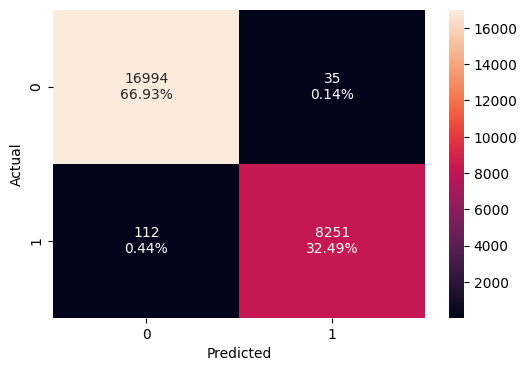

In [ ]:
#Creating a confusion matrix.

confusionMatrixDT(modelDT, xTrainDT, yTrainDT)

***NOTE TO GRADER:*** Please, if you can explain to me why my default decision tree model does not return 100% accuracy, tell me. It caused me so much frustration, and I couldn't figure out why no matter what I did or where I looked.

In [ ]:
#Checking the decision tree performance on testing data.

testMetrics1 = modelPerformDT(modelDT, xTestDT, yTestDT)
testMetrics1

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


While the model using the training data *should* be at 100% across all metrics, the model still performs decently well on the testing data.

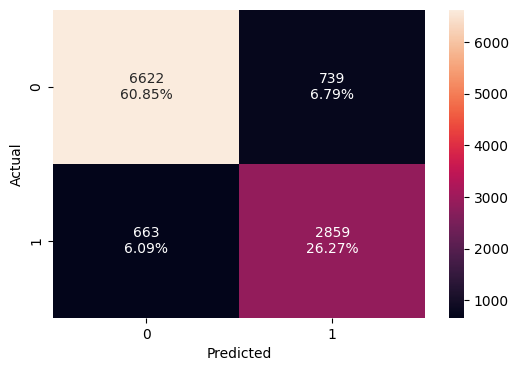

In [ ]:
#Creating a confusion matrix.

confusionMatrixDT(modelDT, xTestDT, yTestDT)

## Do we need to prune the tree?

The tree must be pruned, since it is overfit.

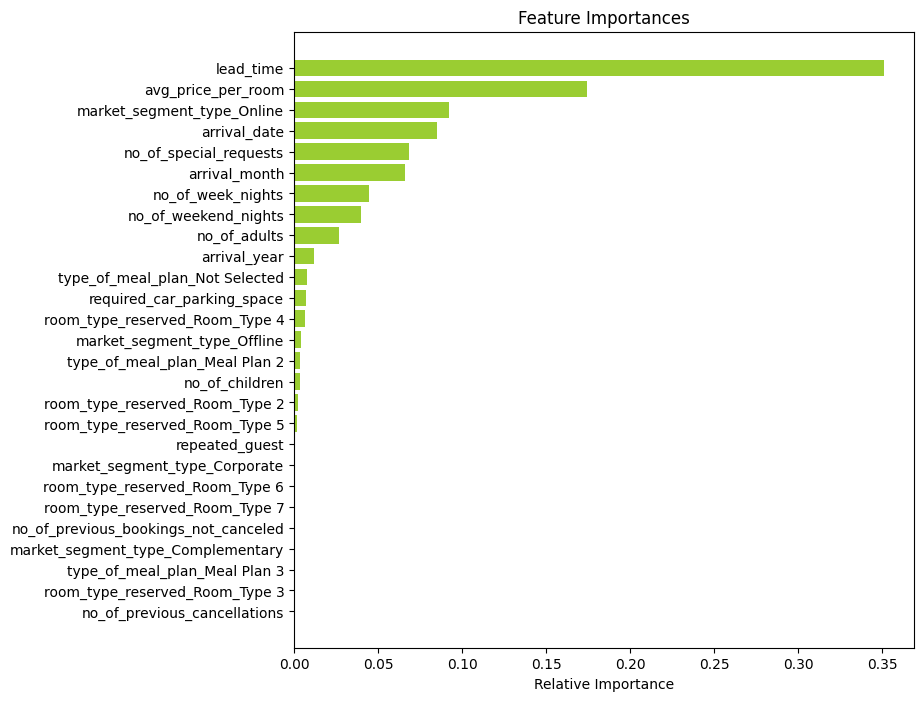

In [ ]:
#Checking the features by level of importance (before pruning).

features = list(xTrainDT.columns)
importances = modelDT.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "yellowgreen", align = "center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Lead time is by far the most important predictor of booking status, followed by average price per room.

###Pre-Pruning

We will pre-prune the decision tree by using GridSearch and various hyperparameters, to prevent it from growing so far that it overfits the data as much as possible.

In [ ]:
#Choosing the type of classifier.
estimator = DecisionTreeClassifier(random_state = 1, class_weight = "balanced")

#Creating a grid of parameters to choose from.
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

#Type of scoring used to compare parameter combinations.
accScorer = make_scorer(f1_score)

#Running the grid search.
gridObj = GridSearchCV(estimator, parameters, scoring = accScorer, cv = 5)
gridObj = gridObj.fit(xTrainDT, yTrainDT)

# Set the clf to the best combination of parameters
estimator = gridObj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(xTrainDT, yTrainDT)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

The GridSearch has determined that the best parameters for the decision tree are:
* max depth of 6 splits
* max 50 leaf nodes
* minimum of 10 samples to be able to split

Let's test it on the data.

In [ ]:
#Checking the decision tree performance on training data.

trainMetrics2 = modelPerformDT(estimator, xTrainDT, yTrainDT)
trainMetrics2

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


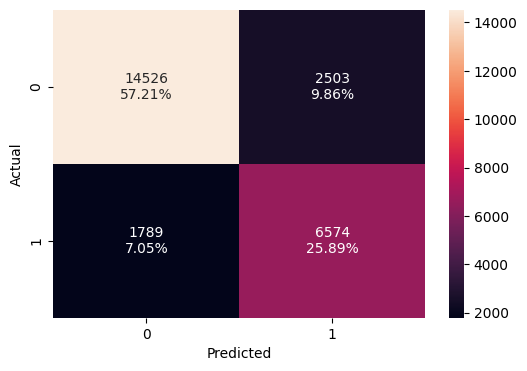

In [ ]:
#Creating a confusion matrix.

confusionMatrixDT(estimator, xTrainDT, yTrainDT)

In [ ]:
#Checking the decision tree performance on testing data.

testMetrics2 = modelPerformDT(estimator, xTestDT, yTestDT)
testMetrics2

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


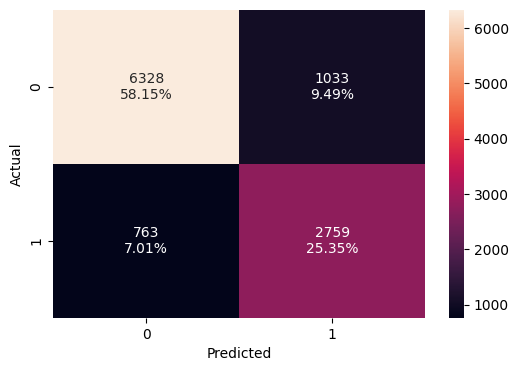

In [ ]:
#Creating a confusion matrix.

confusionMatrixDT(estimator, xTestDT, yTestDT)

The hyperparameters recommended by GridSearch returns a decently successful model across all metrics (accuracy being the highest at about 83%, and precision being the lowest at about 72%) for both training and testing data!

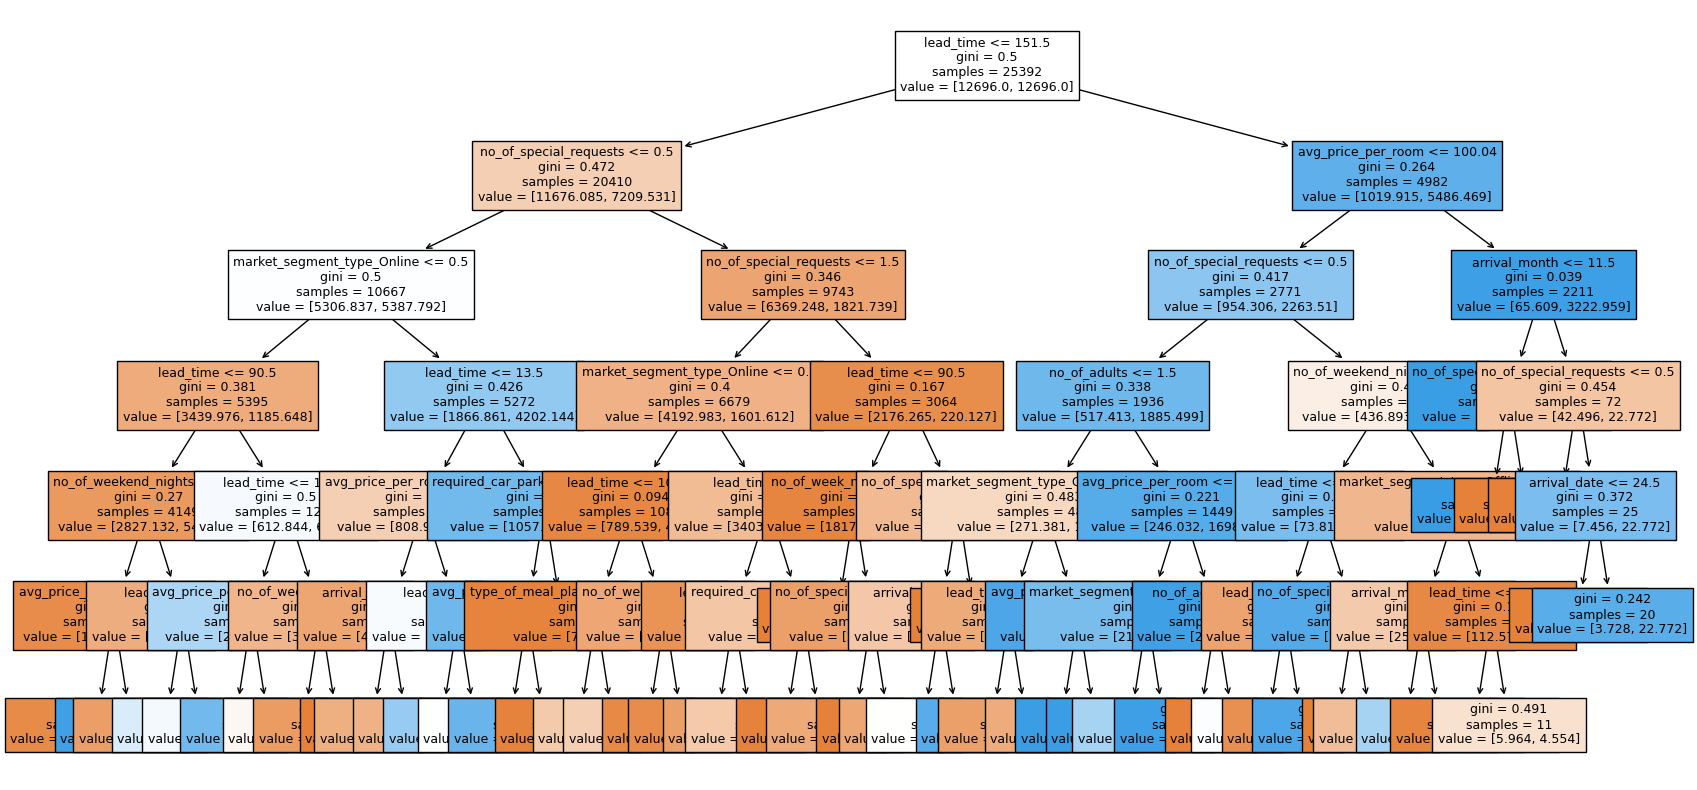

In [ ]:
#Visualizing the tree using the GridSearch model.

plt.figure(figsize = (20,10))
out = tree.plot_tree(
    estimator,
    feature_names = features,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)
#Adding arrows.
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
#Showing the decision rules in text format.

print(tree.export_text(estimator, feature_names = features, show_weights = True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

If the lead time is less than or equal to 151.5 days, the number of special requests is less than or equal to 0.5, ..., and the average price per room is less than 196.5 euros per night, then the booking is likely to NOT be canceled (class 0). The rest of the rules can be read similarly.

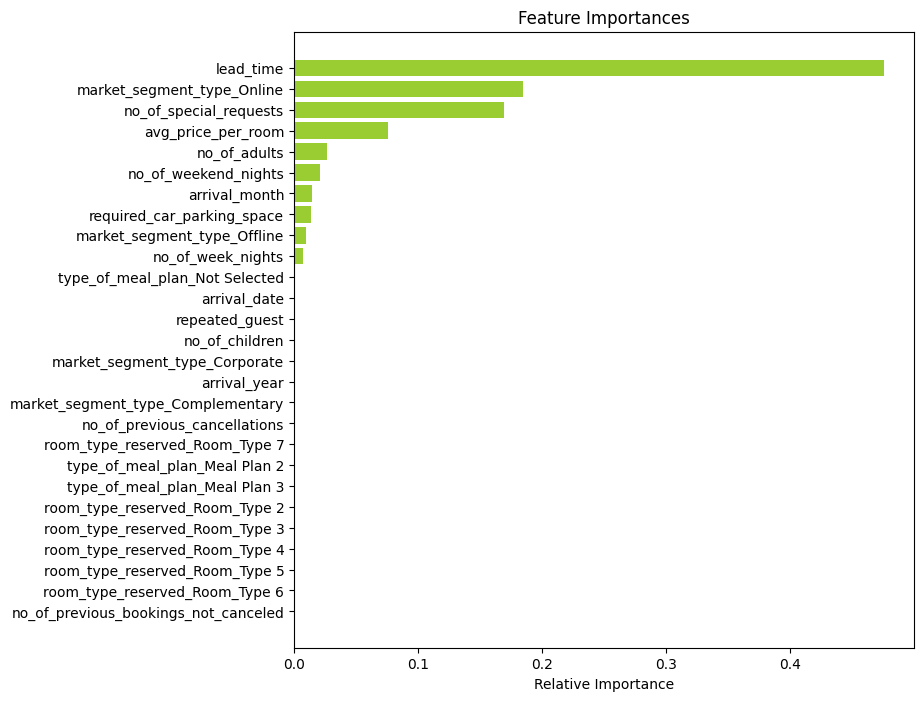

In [ ]:
#Checking the important features of the GridSearch tree.

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "yellowgreen", align = "center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This particular model also had lead time as the most important predictor, but is followed by the "online" market segment type instead of average price per room.

###Post-Pruning

We can also prune the tree after it is fully grown by removing 'branches' that aren't super useful when it comes to classifying the data (the nodes with the smallest alpha).

In [ ]:
#Cost-complexity pruning.

clf = DecisionTreeClassifier(random_state = 1, class_weight = "balanced")
path = clf.cost_complexity_pruning_path(xTrainDT, yTrainDT)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
#Printing the alpha values.

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


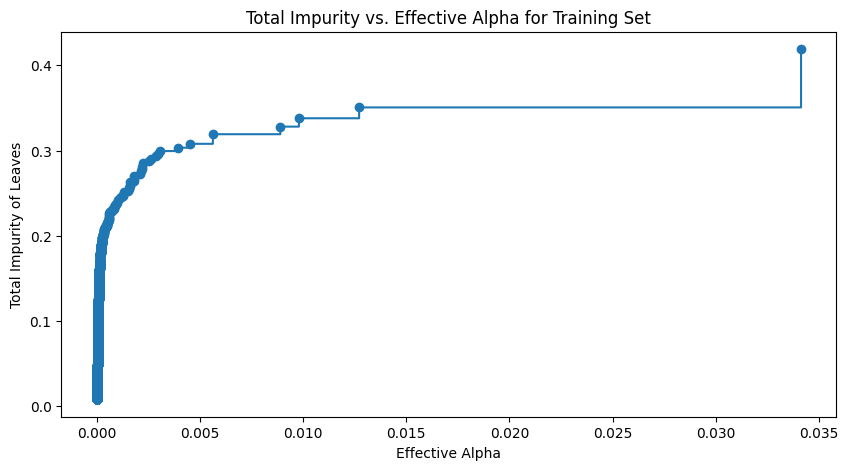

In [ ]:
#Plotting the impurity vs. alpha points.

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs. Effective Alpha for Training Set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in "ccp_alphas" is the alpha value that prunes the whole tree,
leaving the tree, "clfs[-1]", with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state = 1, ccp_alpha = ccp_alpha, class_weight = "balanced"
    )
    clf.fit(xTrainDT, yTrainDT)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


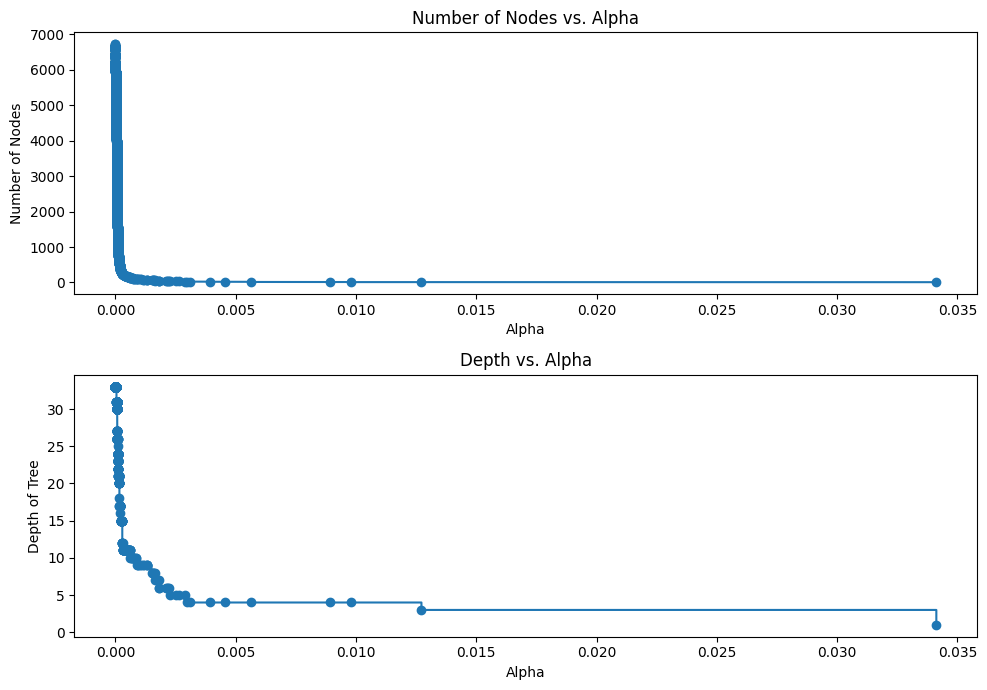

In [ ]:
#Removing the last element (the tree with only one node).
clfs = clfs[: -1]
ccp_alphas = ccp_alphas[: -1]

#Defining variables and setting up a double plot.
nodeCounts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize = (10,7))

#Plotting nodes vs. alpha.
ax[0].plot(ccp_alphas, nodeCounts, marker = "o", drawstyle = "steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs. Alpha")

#Plotting depth vs. alpha.
ax[1].plot(ccp_alphas, depth, marker = "o", drawstyle = "steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs. Alpha")
fig.tight_layout()

We can also plot the recall vs. alpha for both training and testing data to find the model where we have the highest recall for both.

In [ ]:
#Calculating the recall for the training data.

recallTrain = []
for clf in clfs:
    predTrain = clf.predict(xTrainDT)
    valuesTrain = recall_score(yTrainDT, predTrain)
    recallTrain.append(valuesTrain)

In [ ]:
#Calculating the recall for the testing data.

recallTest = []
for clf in clfs:
    predTest = clf.predict(xTestDT)
    valuesTest = recall_score(yTestDT, predTest)
    recallTest.append(valuesTest)

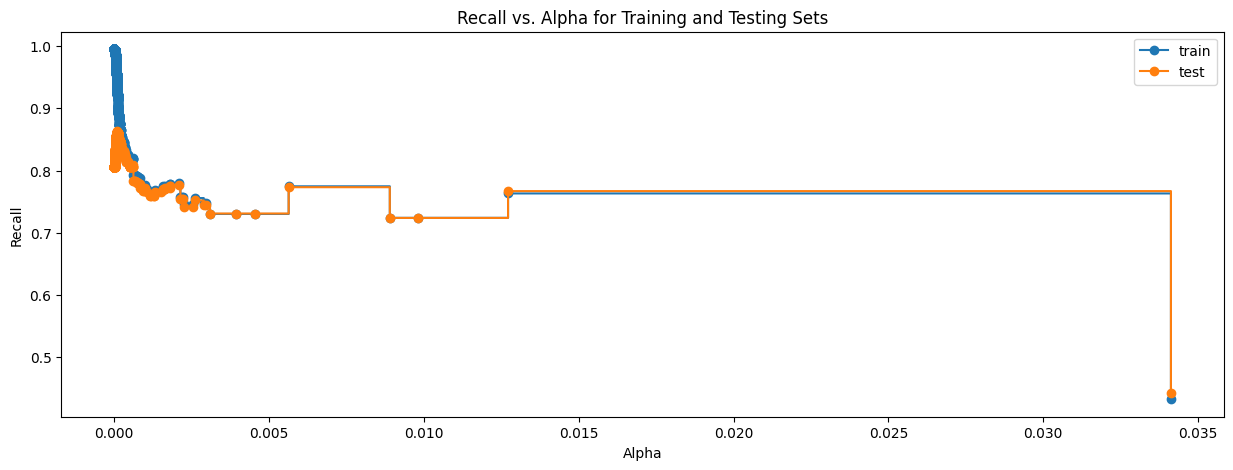

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlabel("Alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs. Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, recallTrain, marker = "o", label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, recallTest, marker = "o", label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

Using, this we can create the best model (has the highest recall for both data sets).

In [ ]:
#Creating the model where we get highest train and test recall.

bestModelIndex = np.argmax(recallTest)
bestModel = clfs[bestModelIndex]
bestModel

DecisionTreeClassifier(ccp_alpha=8.046650001478837e-05, class_weight='balanced',
                       random_state=1)

We can now check the model performance on the training and testing data sets.

In [ ]:
#Checking the decision tree performance on training data.

trainMetrics3 = modelPerformDT(bestModel, xTrainDT, yTrainDT)
trainMetrics3

,Accuracy,Recall,Precision,F1
0,0.92698,0.95133,0.84611,0.89564


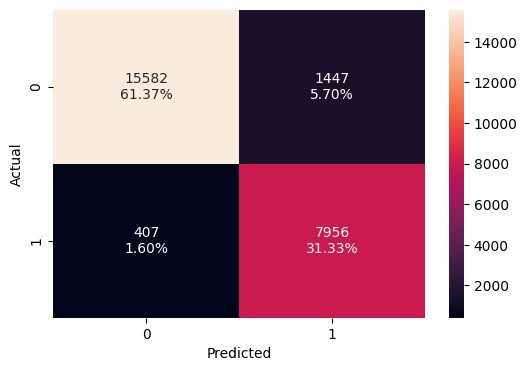

In [ ]:
#Creating a confusion matrix on the training data.

confusionMatrixDT(bestModel, xTrainDT, yTrainDT)

In [ ]:
#Checking the decision tree performance on testing data.

testMetrics3 = modelPerformDT(bestModel, xTestDT, yTestDT)
testMetrics3

,Accuracy,Recall,Precision,F1
0,0.86401,0.86286,0.75297,0.80418


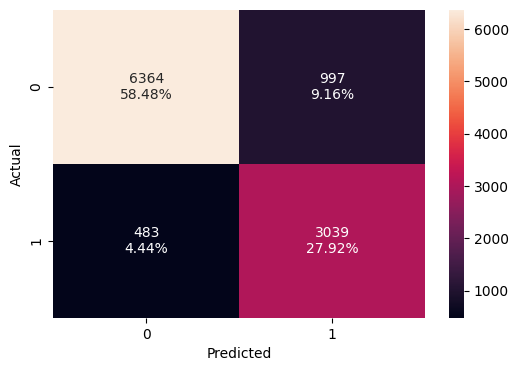

In [ ]:
#Creating a confusion matrix for testing data.

confusionMatrixDT(bestModel, xTestDT, yTestDT)

The post-pruned decision tree is perfoming very well! Let's visualize it.

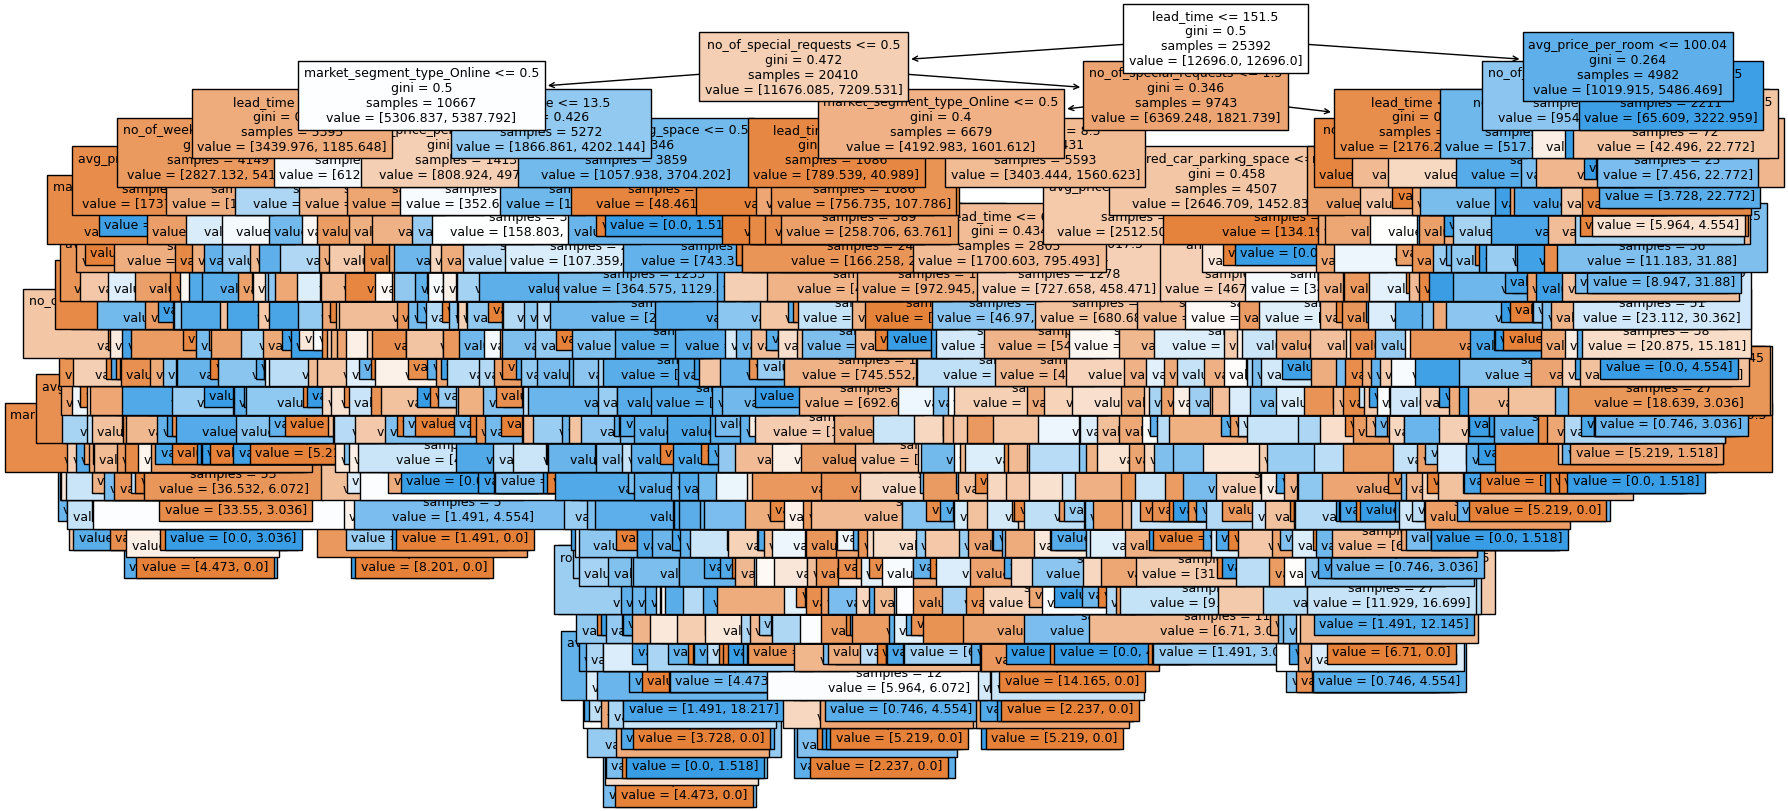

In [ ]:
#Visualizing the tree using the GridSearch model.

plt.figure(figsize = (20,10))
out = tree.plot_tree(
    bestModel,
    feature_names = features,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)
#Adding arrows.
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

This tree is overfit!

In [ ]:
#Showing the decision rules in text format.

print(tree.export_text(bestModel, feature_names = features, show_weights = True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

The desicion rules can be interpreted the same way as those for the pre-pruned tree.

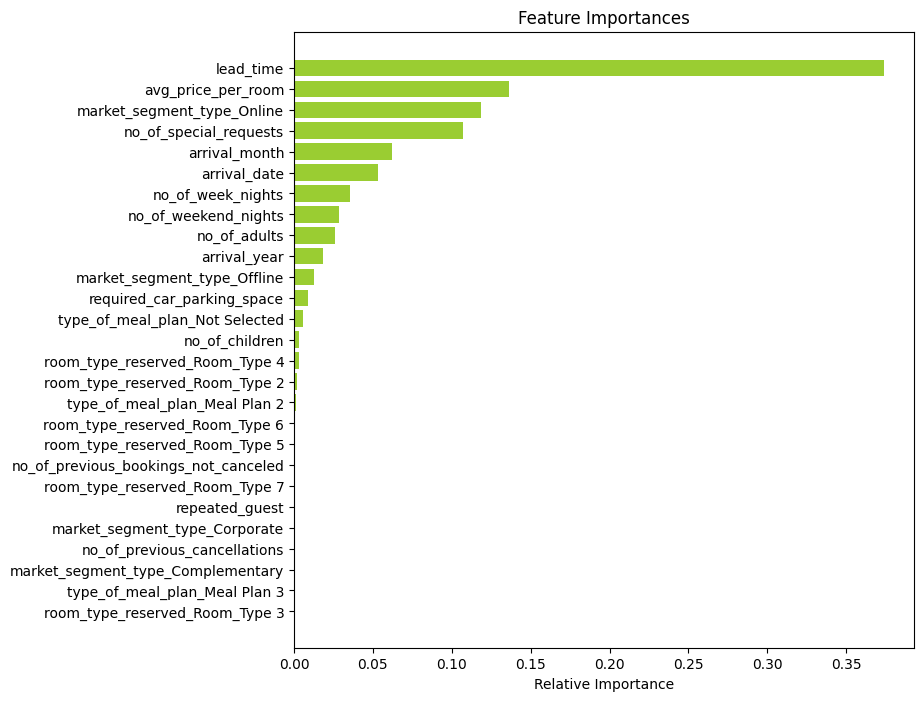

In [ ]:
#Checking the important features of the CCP tree.

importances = bestModel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "yellowgreen", align = "center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Like in the default decision tree, this model has lead time and average price per room as the top two most imporant features for classifying the data.

## Model Performance Comparison

In [ ]:
#Comparing the training data metrics scores.

trainCompare2 = pd.concat(
    [
        trainMetrics1.T,
        trainMetrics2.T,
        trainMetrics3.T,
    ],
    axis = 1,
)
trainCompare2.columns = [
    "Decision Tree (Default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training Performance Comparison:")
trainCompare2

Training Performance Comparison:


,Decision Tree (Default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.92698
Recall,0.98661,0.78608,0.95133
Precision,0.99578,0.72425,0.84611
F1,0.99117,0.75390,0.89564


In [ ]:
#Comparing the testing data metrics scores.

testCompare2 = pd.concat(
    [
        testMetrics1.T,
        testMetrics2.T,
        testMetrics3.T,
    ],
    axis = 1,
)
testCompare2.columns = [
    "Decision Tree (Default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing Performance Comparison:")
testCompare2

Testing Performance Comparison:


,Decision Tree (Default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86401
Recall,0.81175,0.78336,0.86286
Precision,0.79461,0.72758,0.75297
F1,0.80309,0.75444,0.80418


Training:
* The pre-pruned tree has decently high scores, and the tree is not huge. Meanwhile, the post-pruned tree is way too large and overfit. The pre-pruned tree appears to be the better option.

Testing:
* The post-pruned tree performs almost as well as the default tree in most metrics (except precision, where it perfoms not as well). We know the default tree is overfit. Meanwhile, the pre-pruned tree performs decently well still.

The pre-pruned tree is likely the better option between the 3 trees.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

**Lead Time**

According to the models:
* Lead time increases the likelihood of a reservation being canceled by ~1.6% (logit regression)
* Lead time is the top predictor for classifying being a canceled or not canceled reservation (decision tree)

Given that the average lead time is 85 days, and the median is 57, INN Hotels should consider the following profitable policy: Guests that want to cancel a reservation should do it no less than 60 days before their scheduled arrival time to receive a full refund, or 30 days to receive a partial refund. Anything less allows the hotel to keep the payments, since guests typically book ahead. This gives the guests flexibility to cancel, but allows the hotel to keep profits if someone cancels last-minute, or find a replacement guest within the free period.

**Average Room Price**

As stated, the room prices are dynamic, and this is really a measure of how much a reservation costs per day. The average daily price is about €100. Pairing this with the busiest month (October) could work two ways:
1.  Give discounts of daily prices during the month of October to encourage more reservations at the hotel. It could attract even more guests than usual, and thus bring in more money. It could also prevent guests from canceling, since the typical consumer mentality is wanting to "take advantage" of available discounts.
2. Give discounts during the less busy months (January, for example), and keep prices regular during October. Might not attarct extra guests, but will still increase revenue since October is already the busiest month. Just don't increase the prices, as it might increase the likelihood of a reservation being canceled.

Additonally, the data says that mostly pairs of adults (likely couples) book at the INN Hotels, so they could consider slightly increasing prices for couples that book a reservation (perhaps offering "deals" having to do with the meal plans or something).

**Special Requests**

The INN Hotels should consider offering discounts (at their discretion) for guests who have more than 1 special request. For example, if a guests reserved a room on the highest floor AND wants it to have a scenic view, there could be a small discount to encourage them to NOT cancel their reservation. The guests is enthusiactic, and the hotel still gets to charge them extra for the requests (just a bit less than standard).

**General Recommendations**

Based on the data, these are some additional recommendations that might increase revenue (and in tandem, discourage cancelations):
* Promote the hotels to couples; offer couples activities
* Advertise walkability (most reservations did not require parking spots)
* Offer promotions or discounts to returning guests (most guests are new, and repeat guests who are happy with their experience are likely to come back and not cancel if they do)

